### Course Description

This ggplot2 tutorial builds on your knowledge from the first course to produce meaningful explanatory plots. We'll explore the last four optional layers. Statistics will be calculated on the fly and we’ll see how Coordinates and Facets aid in communication. Publication quality plots will be produced directly in R using the Themes layer. We’ll also discuss details on data visualization best practices with ggplot2 to help make sure you have a sound understanding of what works and why. By the end of the course, you’ll have all the tools needed to make a custom plotting function to explore a large data set, combining statistics and excellent visuals.

In [23]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer) #this would be required for myColors <- c(brewer.pal(3, "Dark2"), "black")
library(lattice) # for barley dataset
library(reshape2) #for using the melt function (similar to gather from tidyr)
library(car) #for Vocab dataset

# 1. Statistics

In this chapter, we’ll delve into how to use R ggplot2 as a tool for graphical data analysis, progressing from just plotting data to applying a variety of statistical methods. This includes a variety of linear models, descriptive and inferential statistics (mean, standard deviation and confidence intervals) and custom functions.

## Stats and Geoms - Video

### Smoothing
100xp
Welcome to the exercises for the second ggplot2 course!

To practice on the remaining four layers (statistics, coordinates, facets and themes), we'll continue working on several datasets that we already encountered in the first course.

The mtcars dataset contains information for 32 cars from Motor Trends magazine from 1973. This dataset is small, intuitive, and contains a variety of continuous and categorical (both nominal and ordinal) variables.

In the previous course we learned how to effectively use some basic geometries, such as point, bar and line. In the first chapter of this course we'll explore statistics associated with specific geoms, for example, smoothing and lines.

Instructions
Familiarize yourself again with the mtcars dataset using str().
Extend the first ggplot call: add a LOESS smooth to the scatter plot (which is the default) with geom_smooth(). We want to have the actual values and the smooth on the same plot.
Change the previous plot to use an ordinary linear model, by default it will be y ~ x, so you don't have to specify a formula. You should set the method argument to "lm".
Modify the previous plot to remove the 95% CI ribbon. You should set the se argument to FALSE.
Modify the previous plot to show only the model, and not the underlying dots.

In [ ]:
# ggplot2 is already loaded

# Explore the mtcars data frame with str()
str(mtcars)

# A scatter plot with LOESS smooth:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() + 
  geom_smooth()


# A scatter plot with an ordinary Least Squares linear model:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method="lm")

# The previous plot, without CI ribbon:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE)

# The previous plot, without points:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_smooth(method="lm", se=FALSE)

You can use either stat_smooth() or geom_smooth() to apply a linear model. Remember to always think about how the examples and concepts we discuss throughout the data viz courses can be applied to your own datasets!

### Grouping variables

We'll continue with the previous exercise by considering the situation of looking at sub-groups in our dataset. For this we'll encounter the invisible group aesthetic.

Instructions
 - A plot that maps cyl onto the col aesthetic is already coded.

 - Change col so that factor(cyl) is mapped onto it instead of just cyl.

    Note: In this ggplot command our smooth is calculated for each subgroup because there is an invisible aesthetic, group which inherits from col.

 - Complete the second ggplot command

 - Add another stat_smooth() layer with exactly the same attributes (method set to "lm", se to FALSE).

 - Add a group aesthetic inside the aes() of this new stat_smooth(), set it to a summary variable, 1.

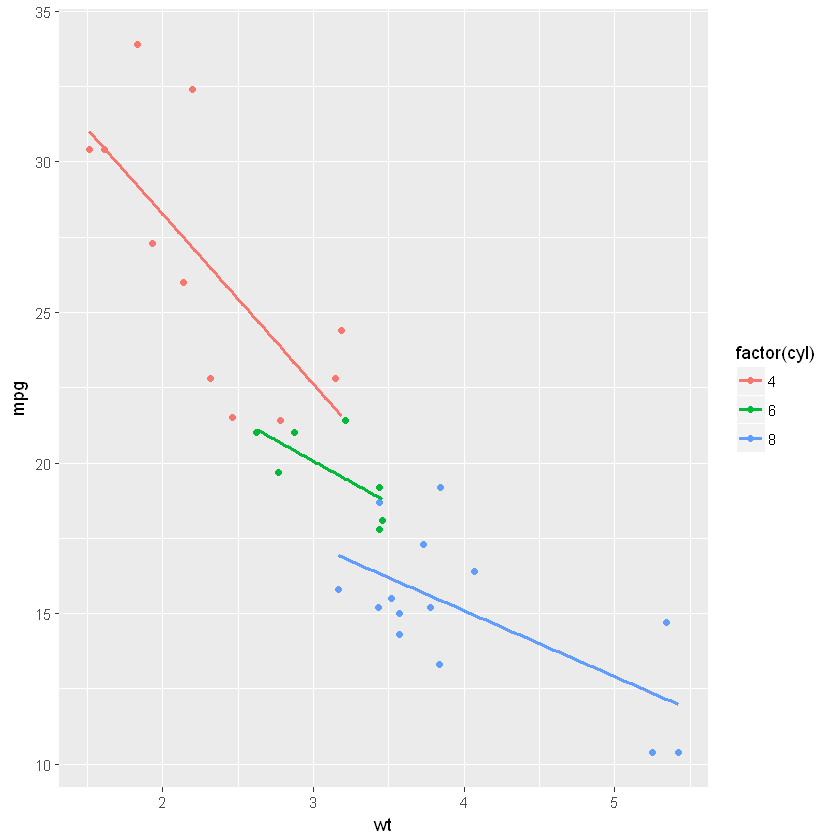

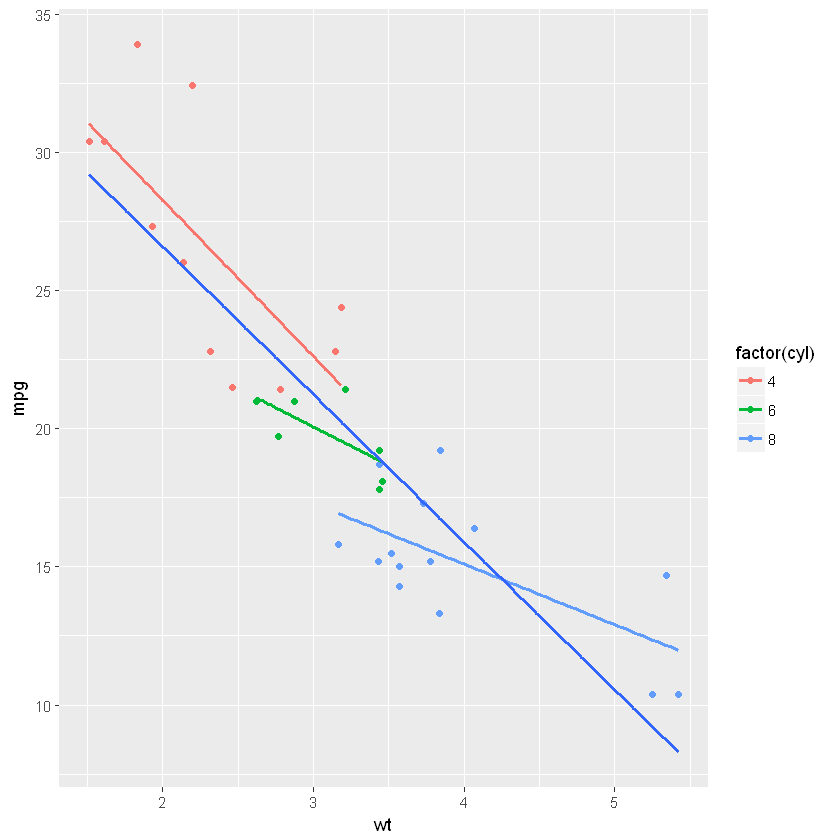

In [3]:
# ggplot2 is already loaded

# Define cyl as a factor variable
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F)

# Complete the following ggplot command as instructed
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) + 
  stat_smooth(method = "lm", se = F, aes(group=1))

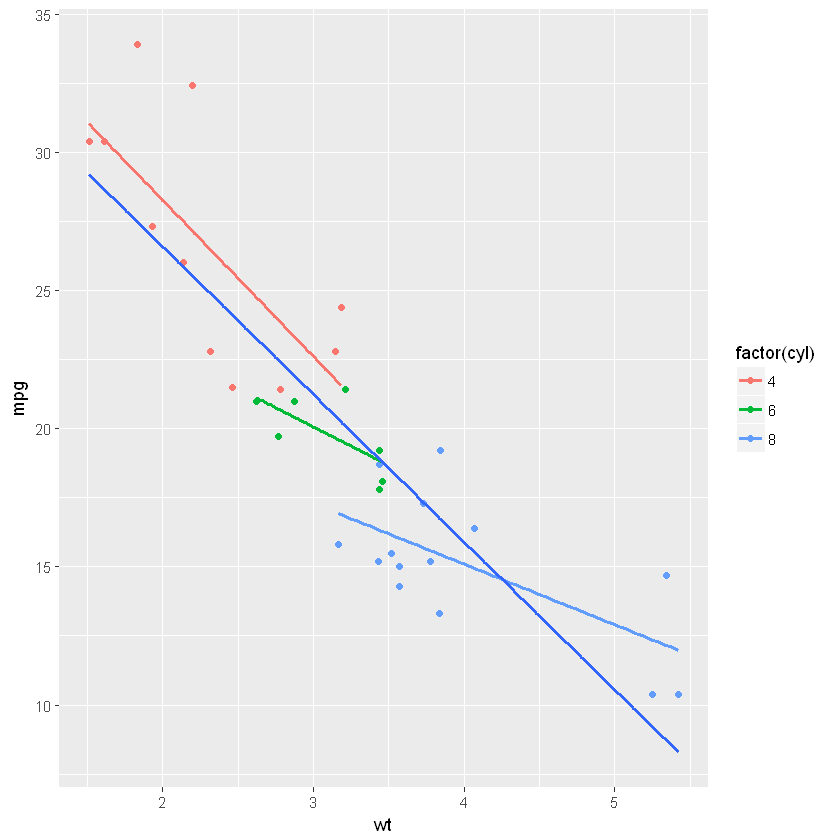

In [4]:
# Complete the following ggplot command as instructed
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  geom_smooth(method = "lm", se = F) + 
  geom_smooth(method = "lm", se = F, aes(group=1))

You can either use stat_smooth or geom_smooth

Notice that we can use multiple aesthetic layers, just like we can use multiple geom layers. Each aesthetic layer can be mapped onto a specific geom.

### Modifying stat_smooth

In the previous exercise we saw how to modify the smooth aesthetic by removing the 95% Confidence Interval. Here we'll consider the span for LOESS smoothing and we'll take a look at a nice scenario of how to properly map our different models.

ggplot2 is already loaded and several of the linear models we looked at in the two previous exercises are already given.

Instructions
Plot 1: Recall that LOESS smoothing is a non-parametric form of regression that uses a weighted, sliding-window, average to calculate a line of best fit. We can control the size of this window with the span argument.

Add span, set it to 0.7
Plot 2: In this plot, we set a linear model for the entire dataset as well as each subgroup, defined by cyl. In the second stat_smooth(),

Set method to "loess"
Add span, set it to 0.7
Plot 3: Plot 2 presents a problem because there is a black line on our plot that is not included in the legend. To get this, we need to map something to col as an aesthetic, not just set col as an attribute.

Add col to the aes() function in the second stat_smooth(), set it to "All". This will name the line properly.
Remove the col attribute in the second stat_smooth(). Otherwise, it will overwrite the col aesthetic.
Plot 4: Now we should see our "All" model in the legend, but it's not black anymore.

Add a scale layer: scale_color_manual() with the first argument set to "Cylinders" and values set to the predfined myColors variable

In [ ]:
library(RColorBrewer) #this would be required for myColors <- c(brewer.pal(3, "Dark2"), "black")

`geom_smooth()` using method = 'loess'


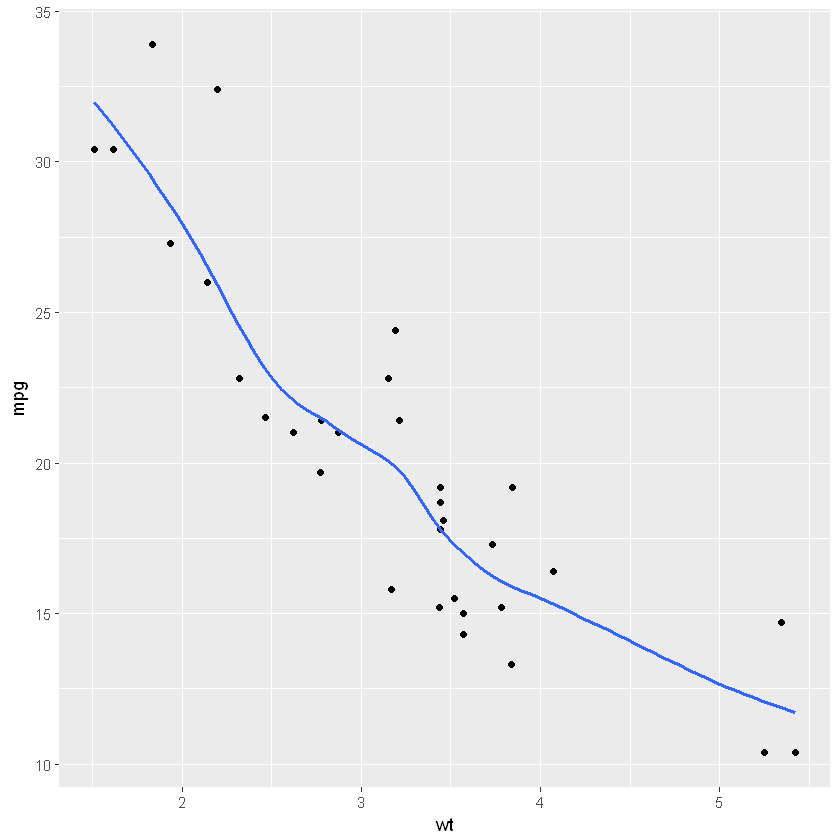

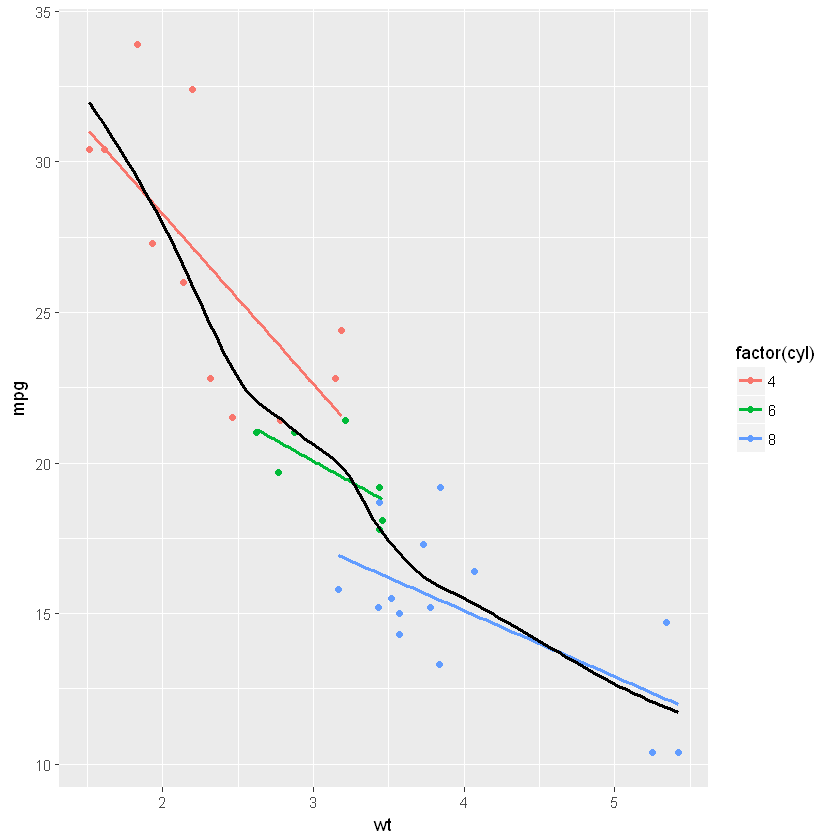

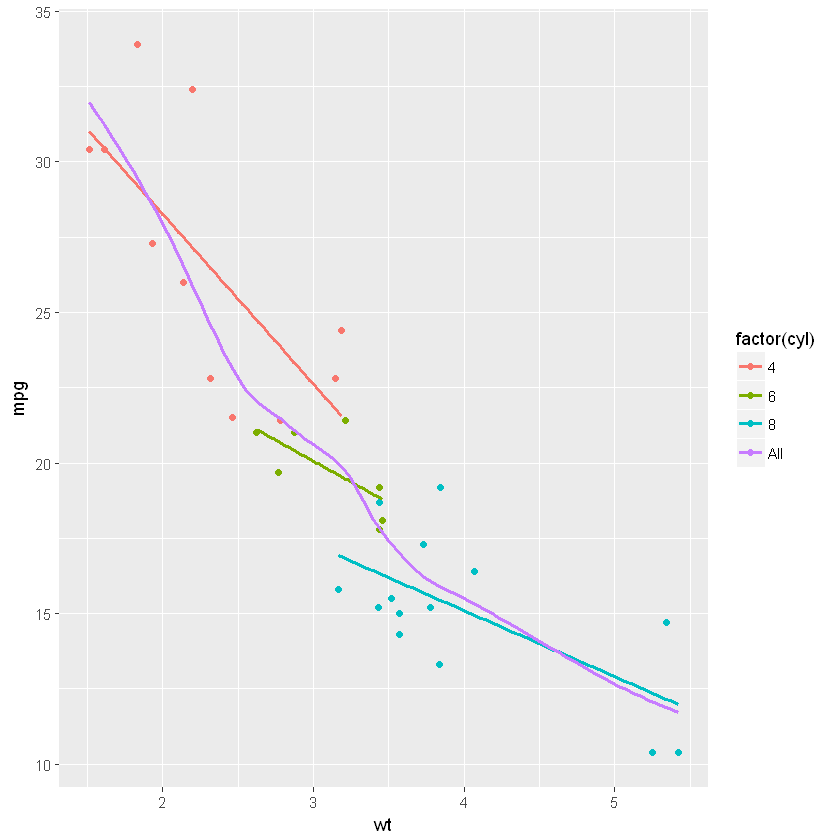

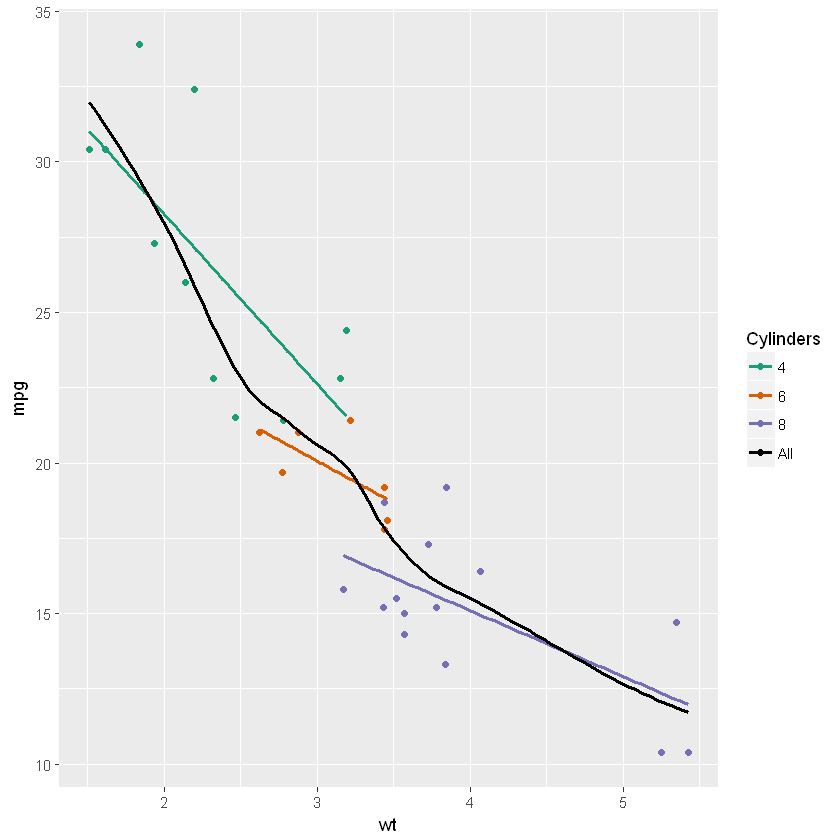

In [14]:
# Plot 1: change the LOESS span
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add span below
  geom_smooth(se = F, span= 0.7)

# Plot 2: Set the overall model to LOESS and use a span of 0.7
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) +
  # Change method and add span below
  stat_smooth(method = "loess", aes(group = 1),
              se = F, col = "black", span=0.7)

# Plot 3: Set col to "All", inside the aes layer of stat_smooth()
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F) +
  stat_smooth(method = "loess",
              # Add col inside aes()
              aes(group = 1, col="All"),
              # Remove the col argument below
              se = F, span = 0.7)

# Plot 4: Add scale_color_manual to change the colors
myColors <- c(brewer.pal(3, "Dark2"), "black")
ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = F, span = 0.75) +
  stat_smooth(method = "loess",
              aes(group = 1, col="All"),
              se = F, span = 0.7) +
  # Add correct arguments to scale_color_manual
  scale_color_manual("Cylinders", values = myColors)

### Modifying stat_smooth (2)

In this exercise we'll take a look at a more subtle example of defining and using linear models. ggplot2 and the Vocab data frame are already loaded for you.

Instructions
Plot 1: The code on the right builds a jittered plot of vocabulary against education of the Vocab data frame.

Add a stat_smooth() layer with method set to "lm". Make sure no CI ribbons are shown by setting se to FALSE.

Plot 2: We'll just focus on the linear models from now on.

Copy the previous command, remove the geom_jitter() layer.

Add the col aesthetic to the ggplot() command. Set it to factor(year).

Plot 3: The default colors are pretty unintuitive. Since this can be considered an ordinal scale, it would be nice to use a sequential color palette.

Copy the previous command, add scale_color_brewer() to use a default ColorBrewer. This should result in an error, since the default palette, "Blues", only has 9 colors, but we have 16 years here.

Plot 4: Overcome the error by using year as a numeric vector. You'll have to specify the invisible group aesthetic which will be factor(year). You are given a scale layer which will fix your coloring, but you'll need to make the following changes:

Add group inside aes(), set it to factor(year).

Inside stat_smooth(), set alpha equal to 0.6 and size equal to 2.

In [ ]:
# Plot 1: Jittered scatter plot, add a linear model (lm) smooth:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.2) +
  stat_smooth(method="lm", se=FALSE)

# Plot 2: Only lm, colored by year
ggplot(Vocab, aes(x = education, y = vocabulary, col=factor(year))) +
  stat_smooth(method="lm", se=FALSE)

# Plot 3: Set a color brewer palette
ggplot(Vocab, aes(x = education, y = vocabulary, col=factor(year))) +
  stat_smooth(method="lm", se=FALSE) +
  scale_color_brewer()


# Plot 4: Add the group, specify alpha and size
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group=factor(year))) +
  stat_smooth(method = "lm", se = F, alpha=0.6, size=2) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

When mapping onto color you can sometimes treat a continuous scale, like year, as an ordinal variable, but only if it is a regular series. The better alternative is to leave it as a continuous variable and use the group aesthetic as a factor to make sure your plot is drawn correctly.

### Quantiles

The previous example used the Vocab dataset and applied linear models describing vocabulary by education for different years. Here we'll continue with that example by using stat_quantile() to apply a quantile regression (method rq).

By default, the 1st, 2nd (i.e. median), and 3rd quartiles are modeled as a response to the predictor variable, in this case education. Specific quantiles can be specified with the quantiles argument.

If you want to specify many quantile and color according to year, then things get too busy. We'll explore ways of dealing with this in the next chapter.

Instructions
 - The code from the previous exercise, with the linear model and a suitable color palette, is already included. Change the stat function from stat_smooth() to stat_quantile(). Consider the arguments that were used with stat_smooth(). You only have to keep alpha and size, throw the other arguments out!
 - The resulting plot will be a mess, because there are three quartiles drawn by default. Copy the code for the previous instruction and set the quantiles argument to 0.5 so that only the median is shown.

Hint
Change stat_smooth() to stat_quantile() in the pre-programmed ggplot command. The arguments se, method and geom are not relevant for this new statistic, so remove them.
Inside stat_quantile() set quantiles to 0.5 to only show the median.

In [ ]:
# Use stat_quantile instead of stat_smooth:
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

# Set quantile to 0.5:
ggplot(Vocab, aes(x = education, y = vocabulary, col = year, group = factor(year))) +
  stat_quantile(alpha = 0.6, size = 2, quantiles = 0.5) +
  scale_color_gradientn(colors = brewer.pal(9,"YlOrRd"))

In [ ]:
### Sum
100xp

Another useful stat function is stat_sum() which calculates the count for each group.
Instructions

    ggplot2 is already loaded. A plot showing a linear model and LOESS regression is already provided and stored as p. Add stat_sum() to this plotting object p. This will map the overall count of each dot onto size. You don't have to set any arguments, the aesthetics will be inherited from the base plot!
    In addition, add the size scale with the generic scale_size() function. Use the range argument to set the minimum and maximum dot sizes as c(1,10).


In [ ]:
# Plot with linear and loess model
p <- ggplot(Vocab, aes(x = education, y = vocabulary)) +
       stat_smooth(method = "loess", aes(col = "red"), se = F) +
       stat_smooth(method = "lm", aes(col = "blue"), se = F) +
       scale_color_discrete("Model", labels = c("blue" = "lm", "red" = "LOESS"))

# Add stat_sum
p + stat_sum()

# Add stat_sum and set size range
p + stat_sum() + scale_size(range=c(1,10))

## Stats outside Geoms - Video

Preparations
100xp

Here we'll look at stat_summary() in action. We'll build up various plots one-by-one.

In this exercise we'll consider the preparations. That means we'll make sure the data is in the right format and that all the positions that we might use in our plots are defined. Lastly, we'll set the base layer for our plot. ggplot2 is already loaded, so you can get started straight away!
Instructions

   -  Use str() to explore the structure of the mtcars dataset.
   -  In mtcars, cyl and am are classified as continuous, but they are actually categorical. Previously we just used factor(), but here we'll modify the actual dataset. Change cyl and am to be categorical in the mtcars data frame using as.factor.
   -  Next we'll set three position objects with convenient names. This allows us to use the exact positions on multiple layers. Create:
   -  posn.d, using position_dodge() with a width of 0.1,
   -  posn.jd, using position_jitterdodge() with a jitter.width of 0.1 and a dodge.width of 0.2
   -  posn.j, using position_jitter() with a width of 0.2.
   -  Finally, we'll make our base layers and store it in the object wt.cyl.am. Make the base call for ggplot mapping cyl to the x, wt to y, am to both col and fill. Also set group = am inside aes(). The reason for these redundancies will become clear later on.


In [2]:
# Display structure of mtcars
str(mtcars)

# Convert cyl and am to factors:
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$am <- as.factor(mtcars$am)

# Define positions:
posn.d <- position_dodge(width=0.1)
posn.jd <- position_jitterdodge(jitter.width = 0.1, dodge.width = 0.2)
posn.j <- position_jitter(width = 0.2)

# base layers:
wt.cyl.am <- ggplot(mtcars, aes(x=cyl, y=wt, col=am, fill=am, group=am))

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


### Plotting variations

Now that the preparation work is done, let's have a look at at stat_summary().

ggplot2 is already loaded, as is wt.cyl.am, which is defined as

`wt.cyl.am <- ggplot(mtcars, aes(x = cyl,  y = wt, col = am, fill = am, group = am))`

Also all the position objects of the previous exercise, posn.d, posn.jd and posn.j, are available. For starters, Plot 1 is already coded for you.
Instructions

   - Plot 2: Add a stat_summary() layer to wt.cyl.am and calculate the mean and standard deviation as we did in the video: set fun.data to mean_sdl and specify fun.args to be list(mult = 1). Set the position argument to posn.d.
   - Plot 3: Repeat the previous plot, but use the 95% confidence interval instead of the standard deviation. You can use mean_cl_normal instead of mean_sdl this time. There's no need to specify fun.args in this case. Again, set position to posn.d.
   - The above plots were simple because they implicitly used a default geom, which is geom_pointrange(). For Plot 4, fill in the blanks to calculate the mean and standard deviation separately with two stat_summary() functions:
   - For the mean, use geom = "point" and set fun.y = mean. This time you should use fun.y because the point geom uses the y aesthetic behind the scenes.
   - Add error bars with another stat_summary() function. Set geom = "errorbar" to get the real "T" tips. Set fun.data = mean_sdl.


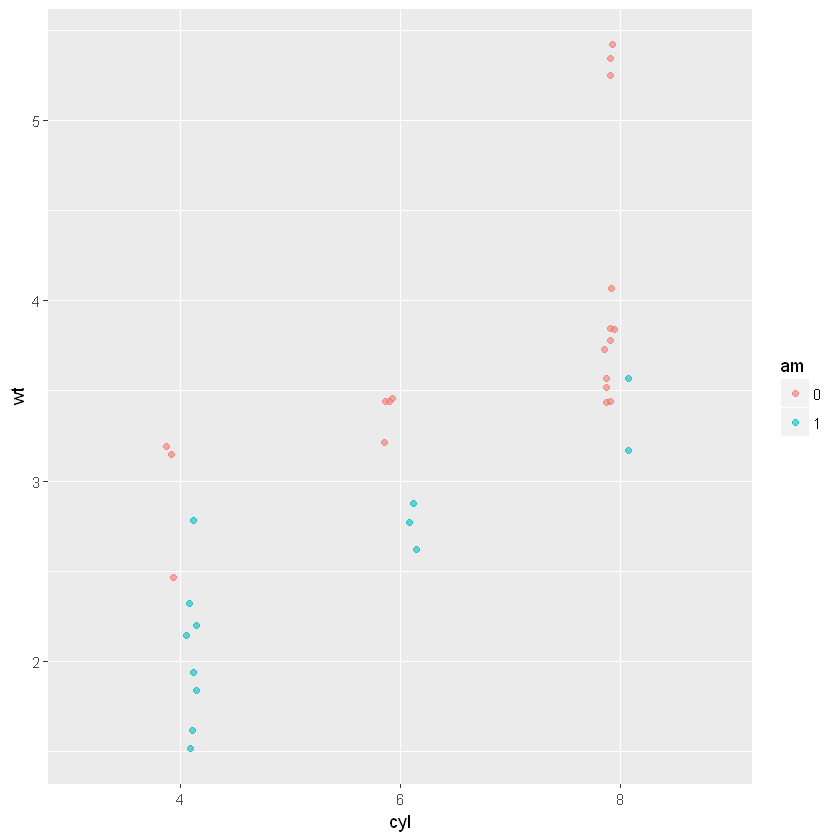

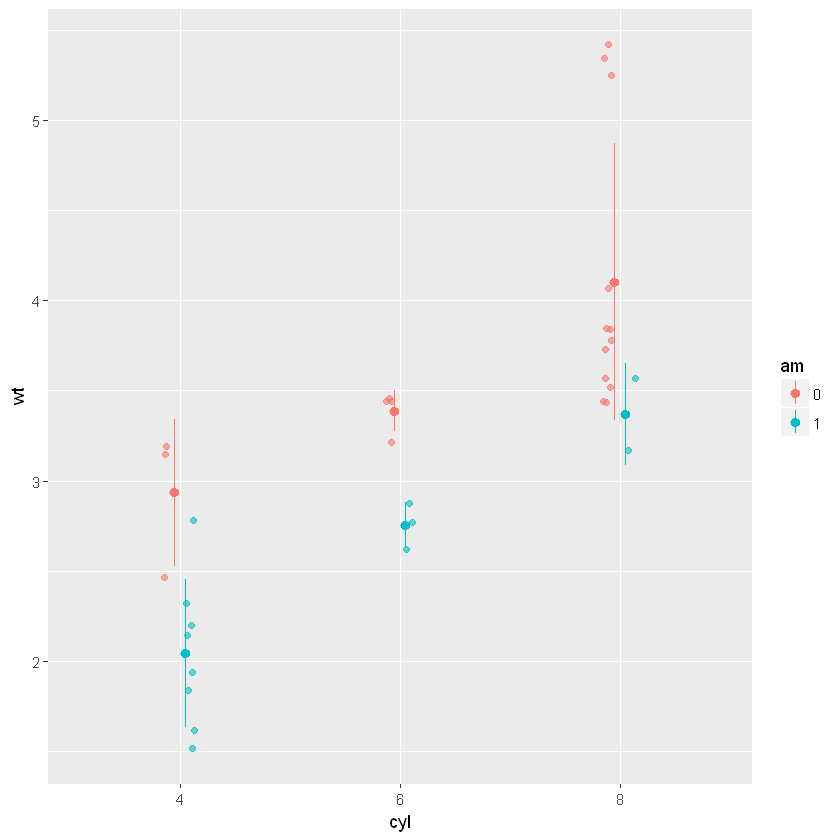

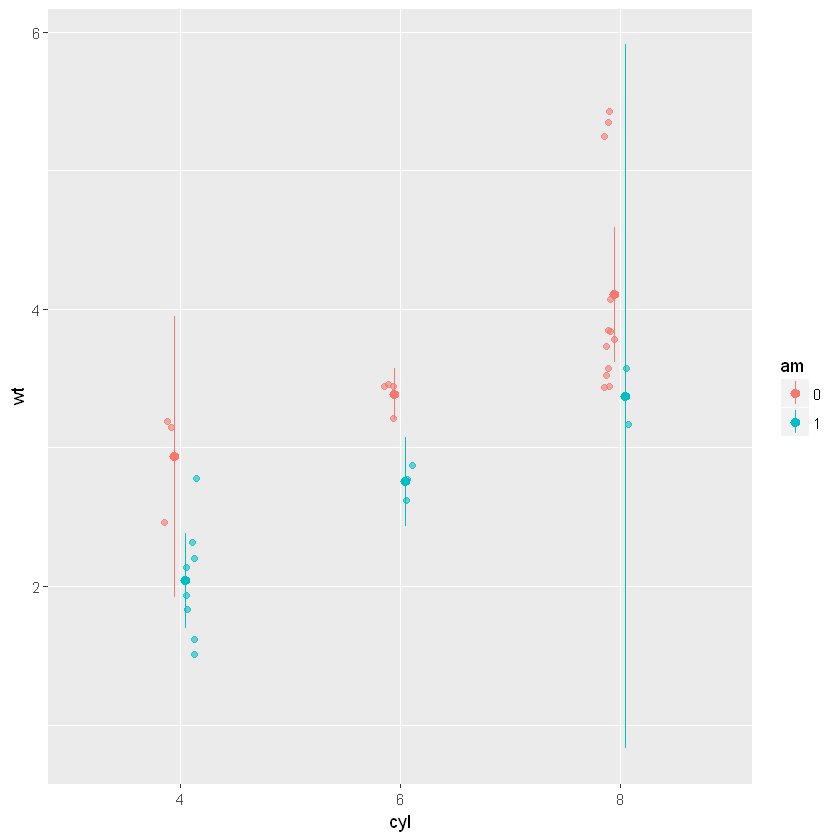

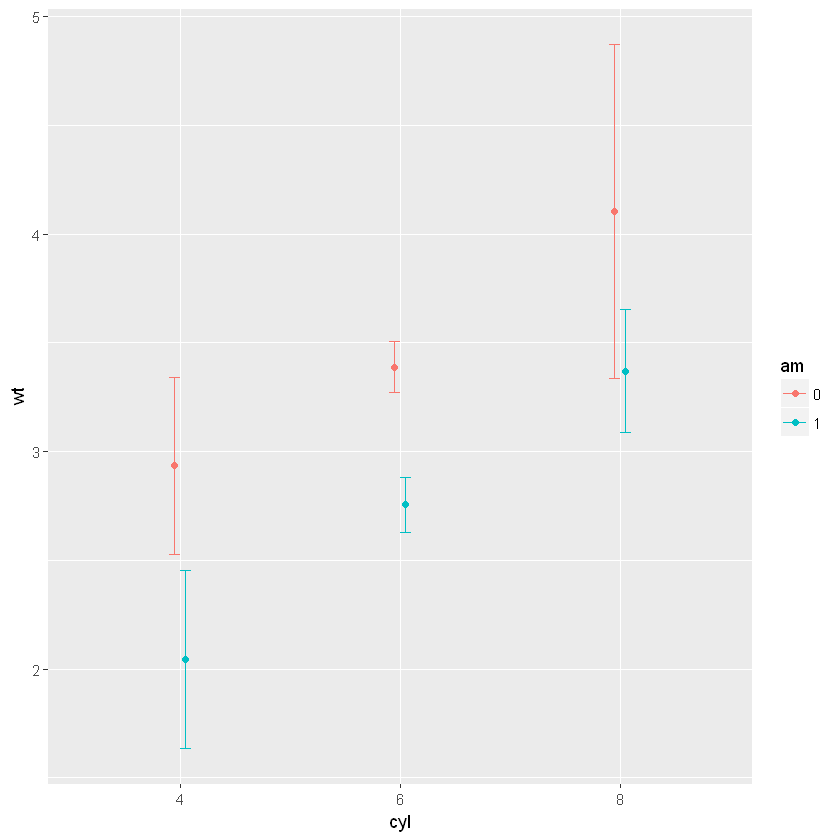

In [3]:
# wt.cyl.am, posn.d, posn.jd and posn.j are available

# Plot 1: Jittered, dodged scatter plot with transparent points
wt.cyl.am +
  geom_point(position = posn.jd, alpha = 0.6)

# Plot 2: Mean and SD - the easy way
wt.cyl.am +
  geom_point(position = posn.jd, alpha = 0.6) +
  stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), position = posn.d)


# Plot 3: Mean and 95% CI - the easy way
wt.cyl.am +
  geom_point(position = posn.jd, alpha = 0.6) +
  stat_summary(fun.data= mean_cl_normal, position = posn.d)


# Plot 4: Mean and SD - with T-tipped error bars - fill in ___
wt.cyl.am +
  stat_summary(geom = "point", fun.y = mean,
               position = posn.d) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl,
               position = posn.d, fun.args = list(mult = 1), width = 0.1)

Remember that you can always specify your own function to the fun.data argument as long as the variable names match the aesthetics that you will need for the geom layer. 

Custom Functions
100xp

In the video we saw that the only difference between ggplot2::mean_sdl() and Hmisc::smean.sdl() is the naming convention. In order to use the results of a function directly in ggplot2 we need to ensure that the names of the variables match the aesthetics needed for our respective geoms.

Here we'll create two new functions in order to create the plot shown in the viewer. One function will measure the full range of the dataset and the other will measure the interquartile range.

A play vector, xx, has been created for you. Execute

mean_sdl(xx, mult = 1)

in the R Console and consider the format of the output. You'll have to produce functions which return similar outputs.
Instructions

  - First, change the arguments ymin and ymax inside the data.frame() call of gg_range().

  - ymin should be the minimum of x

  - ymax should be the maximum of x

  - Use min() and max(). Watch out, naming is important here. gg_range(xx) should now generate the required output.

  - Next, change the arguments y, ymin and ymax inside the data.frame() call of med_IQR().

  - y should be the median of x

  - ymin should be the first quartile

  - ymax should be the 3rd quartile.

  - You should use median() and quantile(). For example, quantile() can be used as follows to give the first quartile: quantile(x)[2]. med_IQR(xx) should now generate the required output.


In [4]:
xx = 1:100

In [5]:
# Play vector xx is available

# Function to save range for use in ggplot
gg_range <- function(x) {
  # Change x below to return the instructed values
  data.frame(ymin = min(x), # Min
             ymax = max(x)) # Max
}

gg_range(xx)
# Required output:
#   ymin ymax
# 1    1  100

# Function to Custom function:
med_IQR <- function(x) {
  # Change x below to return the instructed values
  data.frame(y = median(x), # Median
             ymin = quantile(x)[2], # 1st quartile
             ymax = quantile(x)[4] ) # 3rd quartile
}

med_IQR(xx)
# Required output:
#        y  ymin  ymax
# 25% 50.5 25.75 75.25

ymin,ymax
1,100


,y,ymin,ymax
25%,50.5,25.75,75.25


In [ ]:
Custom Functions (2)
100xp

In the last exercise we created functions that will allow us to plot the so-called five-number summary (the minimum, 1st quartile, median, 3rd quartile, and the maximum). Here, we'll implement that into a unique plot type.

All the functions and objects from the previous exercise are available including the updated mtcars data frame, the position object posn.d, the base layers wt.cyl.am and the functions med_IQR() and gg_range().

The plot you'll end up with at the end of this exercise is shown on the right.
Instructions

Complete the given stat_summary() functions, only fill in the ___ and don't change the predefined arguments:

    The first stat_summary() layer should have geom set to "linerange". fun.data argument should be set to med_IQR, the function you used in the previous exercise.
    The second stat_summary() uses the "linerange" geom. This time fun.data should be gg_range, the other function you created. Also set alpha to 0.4.
    For the last stat_summary(), use geom = "point". The points should have col "black" and shape "X".


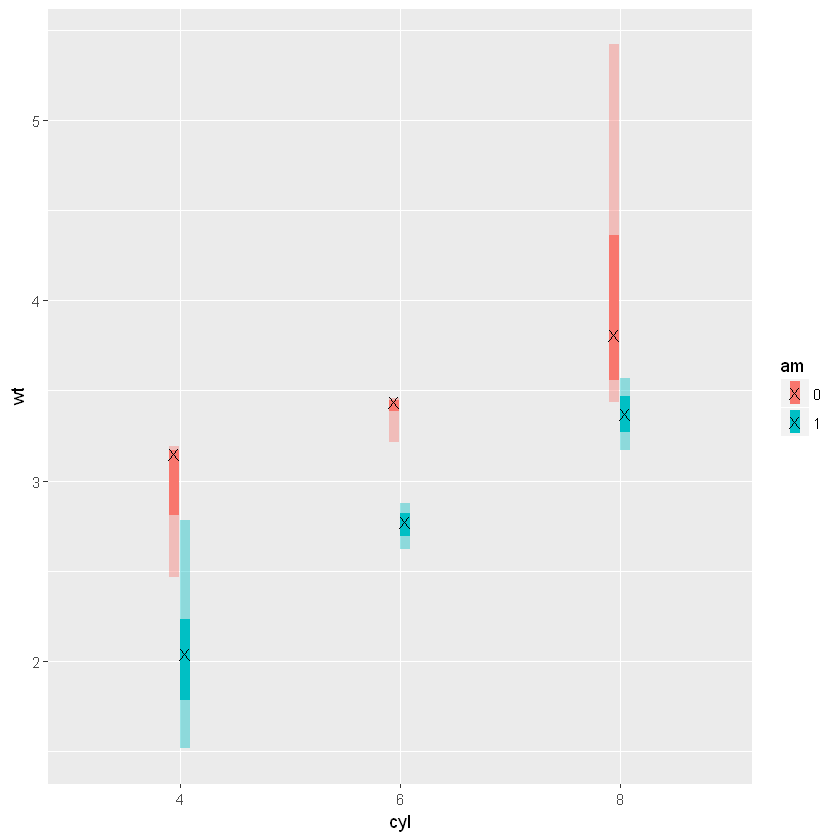

In [6]:
# The base ggplot command, you don't have to change this
wt.cyl.am <- ggplot(mtcars, aes(x = cyl,y = wt, col = am, fill = am, group = am))

# Add three stat_summary calls to wt.cyl.am
wt.cyl.am +
  stat_summary(geom = "linerange", fun.data = med_IQR,
               position = posn.d, size = 3) +
  stat_summary(geom = "linerange", fun.data = gg_range,
               position = posn.d, size = 3,
               alpha = 0.4) +
  stat_summary(geom = "point", fun.y = median,
               position = posn.d, size = 3,
               col = "black", shape = "X")

If you are familiar with box plots, you may notice some similarities to our plot. We'll explore box plots in detail in the third course. 

# 2. Coordinates and Facets

The Coordinates and Facets layers offer specific and very useful tools for efficiently and accurately communicating data. In this chapter we’ll look at the various ways of effectively using these two layers. 

## Coordinates Layer - Video

### Zooming In

In the video, you saw different ways of using the coordinates layer to zoom in. In this exercise, we'll compare some of the techniques again.

As usual, you'll be working with the mtcars dataset, which is already cleaned up for you (cyl and am are categorical variables). Also p, a ggplot object you coded in the previous chapter, is already available. Execute p in the console to check it out.
Instructions

   -  Extend p with a scale_x_continuous() with limits = c(3, 6) and expand = c(0, 0). What do you see?
   -  Try again, this time with coord_cartesian(): Set the xlim argument equal to c(3, 6). Compare the two plots.


`geom_smooth()` using method = 'loess'
Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  4e-006"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.002"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"Warning message in s

`geom_smooth()` using method = 'loess'


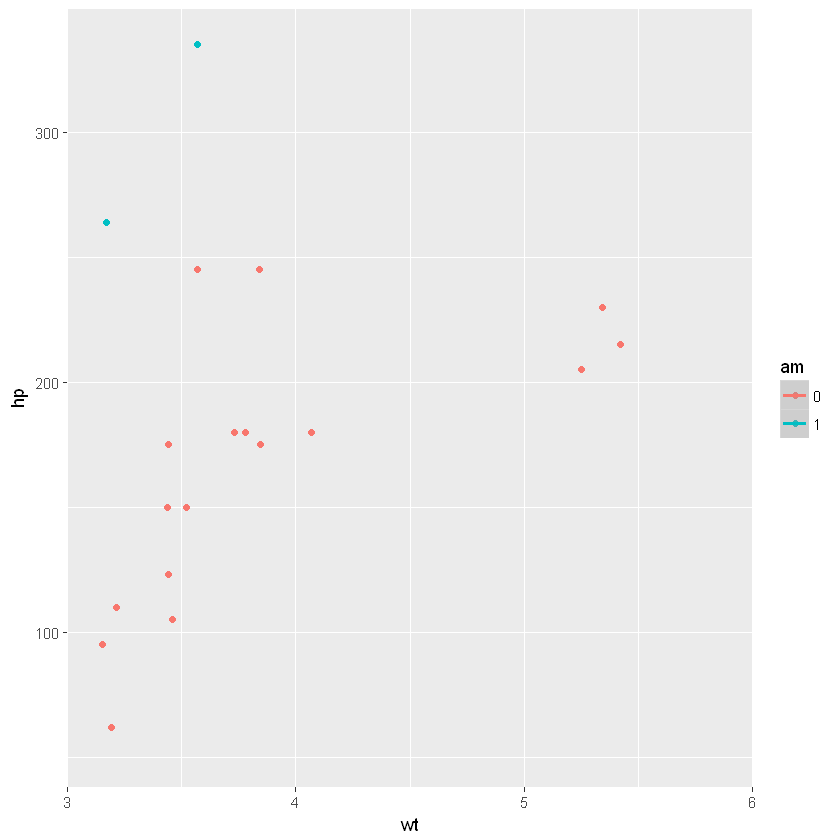

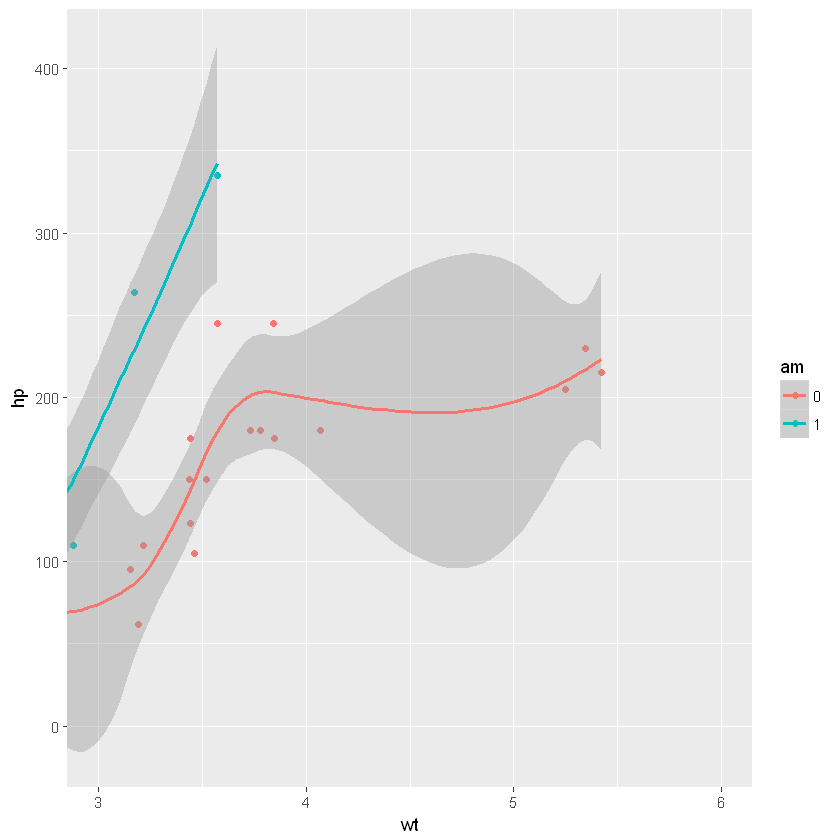

In [7]:
# Basic ggplot() command, coded for you
p <- ggplot(mtcars, aes(x = wt, y = hp, col = am)) + geom_point() + geom_smooth()

# Add scale_x_continuous
p + scale_x_continuous(limits = c(3,6), expand=c(0,0))

# The proper way to zoom in:
p + coord_cartesian(xlim=c(3,6))


### Aspect Ratio

We can set the aspect ratio of a plot with coord_fixed() or coord_equal(). Both use aspect = 1 as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.

All variables are measured in centimeters, so it only makes sense that one unit on the plot should be the same physical distance on each axis. This gives a more truthful depiction of the relationship between the two variables since the aspect ratio can change the angle of our smoothing line. This would give an erroneous impression of the data.

Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.
Instructions

   - Complete the basic scatter plot function using the iris data frame to plot Sepal.Width onto the y aesthetic, Sepal.Length onto the x and Species onto col. You should understand all the other functions used in this plotting call by now. This is saved in an object called base.plot.
   - Write base.plot on a new line to print it out. Examine it: a plot drawn to the dimensions of the graphics device.
   - Add a coord_equal() layer to force a 1:1 aspect ratio.


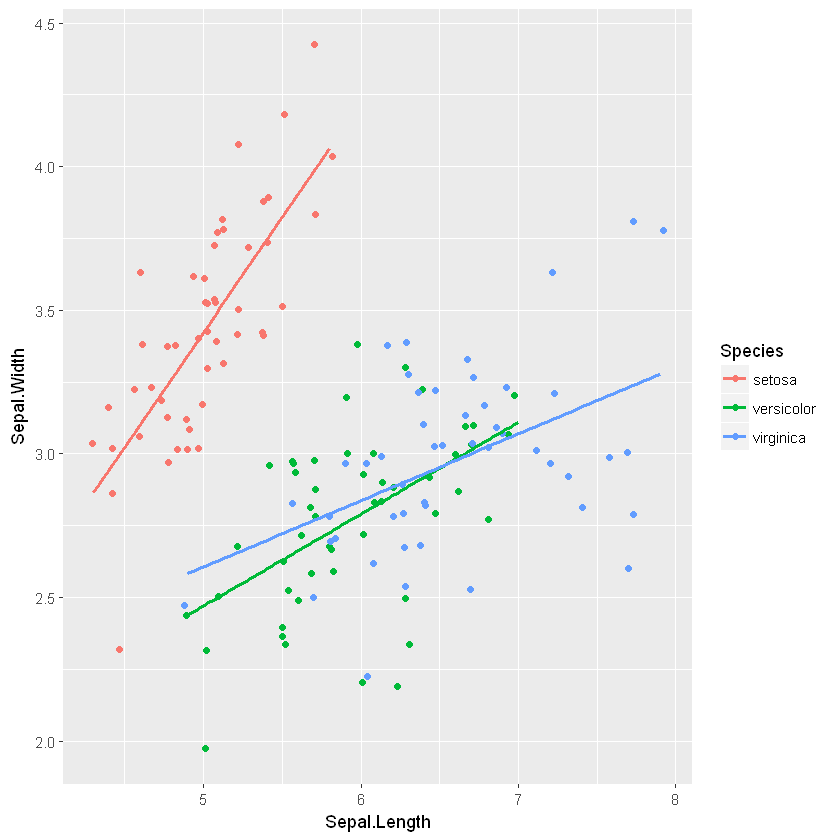

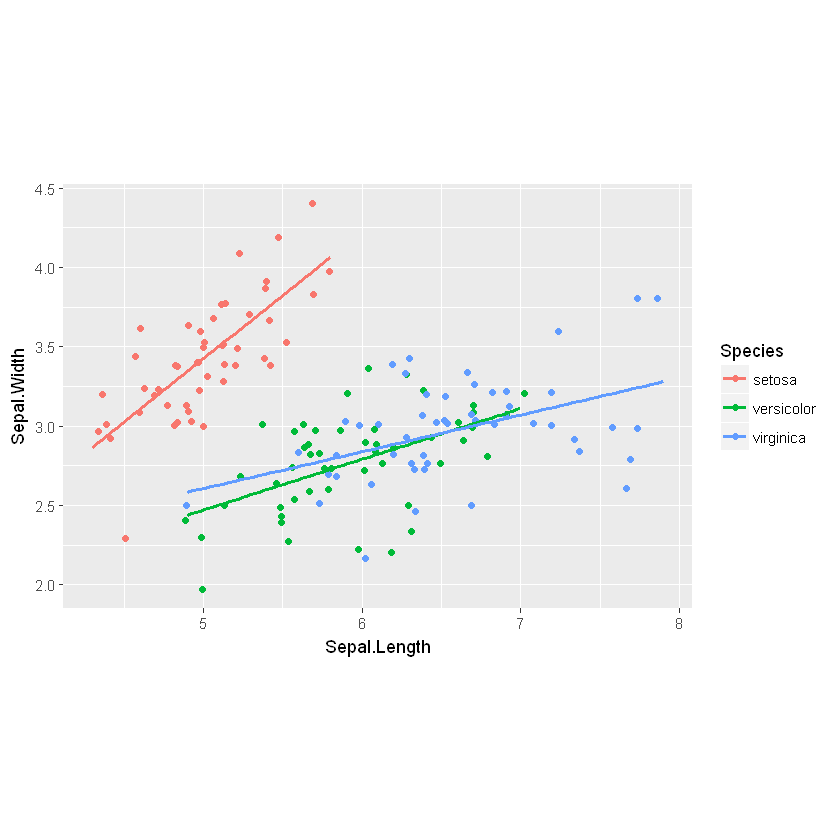

In [8]:
# Complete basic scatter plot function
base.plot <- ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, col=Species)) +
               geom_jitter() +
               geom_smooth(method = "lm", se = F)

# Plot base.plot: default aspect ratio
base.plot

# Fix aspect ratio (1:1) of base.plot
base.plot + coord_equal(1:1)

 As a rule of thumb you'll want to use a 1:1 aspect ratio when your axes show the same scales, but there are always exceptions. 

### Pie Charts
100xp

The coord_polar() function converts a planar x-y cartesian plot to polar coordinates. This can be useful if you are producing pie charts.

We can imagine two forms for pie charts - the typical filled circle, or a colored ring.

As an example, consider the stacked bar chart shown in the viewer. Imagine that we just take the y axis on the left and bend it until it loops back on itself, while expanding the right side as we go along. We'd end up with a pie chart - it's simply a bar chart transformed onto a polar coordinate system.

Typical pie charts omit all of the non-data ink, which we'll learn about in the next chapter. Pie charts are not really better than stacked bar charts, but we'll come back to this point in the fourth chapter on best practices.

The mtcars data frame is available, with cyl converted to a factor for you.
Instructions

  -  Create a basic stacked bar plot. Since we have univariate data and stat_bin() requires an x aesthetic, we'll have to use a dummy variable. Set x to 1 and map cyl onto fill. Assign the bar plot to thin.bar.
  -  Add a coord_polar() layer to thin.bar. Set the argument theta to "y". This specified the axis which would be transformed to polar coordinates. There's a ring structure instead of a pie!
  -  Repeat the code for the stacked bar plot, but this time set the width argument inside the geom_bar() function to 1 and assign this plot to wide.bar. This fills up the plot so that there is no empty space on our x scale.
  -  Add a coord_polar() layer to wide.bar, as you did before.


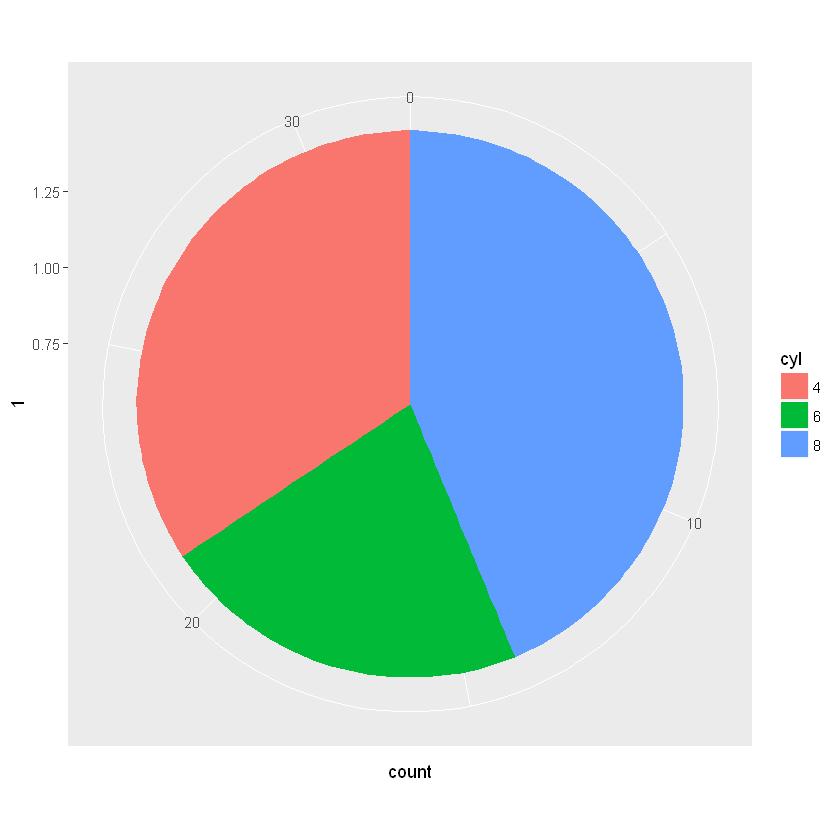

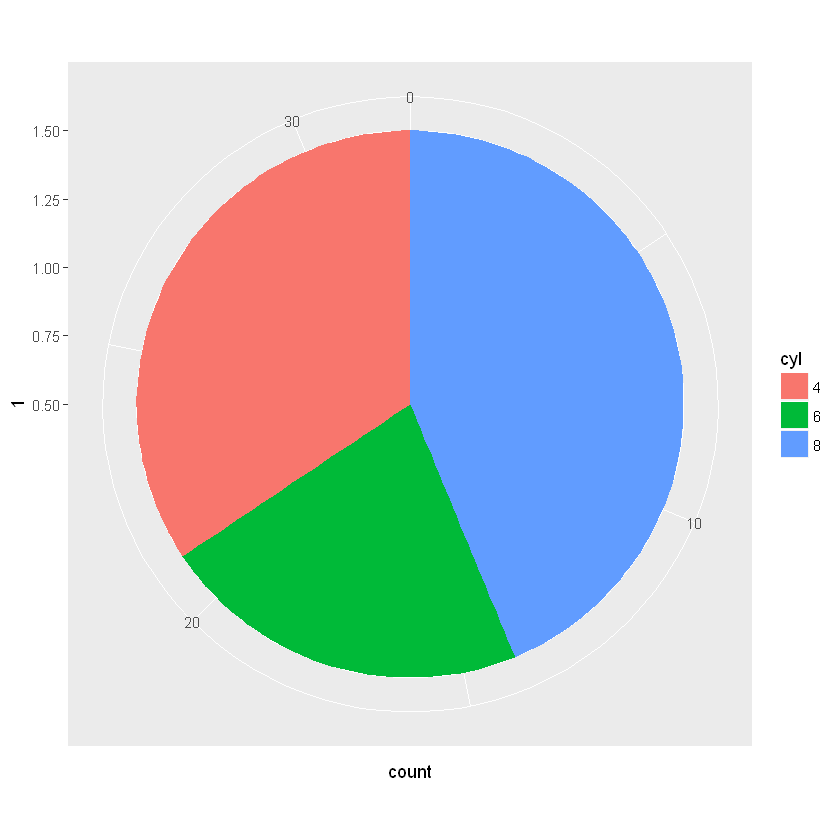

In [9]:
# Create stacked bar plot: thin.bar
thin.bar <- ggplot(mtcars, aes(x=1, fill=cyl)) +
              geom_bar()

# Convert thin.bar to pie chart
thin.bar + coord_polar(theta = "y")

# Create stacked bar plot: wide.bar
wide.bar <- ggplot(mtcars, aes(x=1, fill=cyl)) +
              geom_bar(width=1)


# Convert wide.bar to pie chart
wide.bar + coord_polar(theta="y")

## Facets Layer - Video

### Facets: the basics
100xp

The most straightforward way of using facets is facet_grid(). Here we just need to specify the categorical variable to use on rows and columns using formula notation.

Notice that we can also take advantage of ordinal variables by positioning them in the correct order as columns or rows, as is the case with the number of cylinders. Get some hands-on practice in this exercise; ggplot2 is already loaded for you. mtcars is available where cyl and am are factors.
Instructions

Starting from the basic scatter plot, use facet_grid() and the formula notation to facet the plot in three different ways:

   - Rows by am.
   - Columns by cyl.
   - Rows and columns by am and cyl.


In [ ]:
# Basic scatter plot:
p <- ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# Separate rows according to transmission type, am
p + facet_grid(am~.)

# Separate columns according to cylinders, cyl
p + facet_grid(.~cyl)

# Separate by both columns and rows 
p + facet_grid(am~cyl)



### Many variables
100xp

Facets are another way of presenting categorical variables. Recall that we saw all the ways of combining variables, both categorical and continuous, in the aesthetics chapter. Sometimes it's possible to overdo it. Here we'll present a plot with 6 variables and see if we can add even more.

Let's begin by using a trick to map two variables onto two color scales - hue and lightness. We combine cyl and am into a single variable cyl_am. To accommodate this we also make a new color palette with alternating red and blue of increasing darkness. This is saved as myCol.

Instructions

  -  Beginning with the basic scatter plot, add a color scale for cyl_am including a scale_color_manual() layer using the vector myCol as the values.
  -  Copy your scatter plot code from the previous instruction and add a facet_grid() layer facetting the plot according to gear on rows and vs on columns (0 is a V-engine and 1 is a straight engine). Now we have 6 variables in total (4 categorical variables and 2 continuous variables). The plot is still readable, but it's starting to get difficult.
  -  We can try and add one more variable, using size. Map disp, the displacement volume from each cylinder, onto size. We haven't used alpha, but for a more dense dataset, that would also be necessary. It would also make it more difficult to read cyl which is mapped onto lightness.


In [ ]:
# Code to create the cyl_am col and myCol vector
mtcars$cyl_am <- paste(mtcars$cyl, mtcars$am, sep = "_")
myCol <- rbind(brewer.pal(9, "Blues")[c(3,6,8)],
               brewer.pal(9, "Reds")[c(3,6,8)])

# Basic scatter plot, add color scale:
ggplot(mtcars, aes(x = wt, y = mpg, col=cyl_am)) +
  geom_point() +
  scale_color_manual(values=myCol)

  
# Facet according on rows and columns.
ggplot(mtcars, aes(x = wt, y = mpg, col=cyl_am)) +
  geom_point() +
  scale_color_manual(values=myCol) + 
  facet_grid(gear~vs)




# Add more variables
ggplot(mtcars, aes(x = wt, y = mpg, col=cyl_am, size=disp)) +
  geom_point() +
  scale_color_manual(values=myCol) + 
  facet_grid(gear~vs)

The last plot you've created here is simply trying to plot too much information. 

### Dropping levels
100xp

When you have a categorical variable with many levels which are not all present in sub-groups of another variable, it may be desirable to drop the unused levels. As an example let's return to the mammalian sleep dataset, mamsleep. It is available in your workspace.

The variables of interest here are name, which contains the full popular name of each animal, and vore, the eating behavior. Each animal can only be classified under one eating habit, so if we facet according to vore, we don't need to repeat the full list in each sub-plot.
Instructions

  -  Create a basic scatter plot using mamsleep, with time mapped to x, name to y and sleep to col.
  -  Extend the code for the previous instruction: facet rows according to vore. If you look at the resulting plot, you'll notice that there are a lot of lines where no data is available.
  -  Extend facet_grid with scale = "free_y" and space = "free_y" to leave out rows for which there's no data.


In [10]:
head(mamsleep)

ERROR: Error in head(mamsleep): object 'mamsleep' not found


In [ ]:
# Basic scatter plot
ggplot(mamsleep, aes(x=time, y=name, col=sleep)) + 
geom_point()

# Facet rows accoding to vore
ggplot(mamsleep, aes(x=time, y=name, col=sleep)) + 
geom_point() +
facet_grid(vore~.)

# Specify scale and space arguments to free up rows
ggplot(mamsleep, aes(x=time, y=name, col=sleep)) + 
geom_point() +
facet_grid(vore~., scale="free_y", space="free_y")

# 3. Themes

Now that you’ve built high-quality plots, it’s time to make them pretty. This is the last step in the data viz process. The Themes layer will enable you to make publication quality plots directly in R.

Tidyverse Wesbsite : http://ggplot2.tidyverse.org/reference/theme.html

## Themes from Scratch - Video

In [ ]:
### Rectangles
100xp

To understand all the arguments for the themes, you'll modify an existing plot over the next series of exercises.

Here you'll focus on the rectangles of the plotting object z that has already been created for you. If you type z in the console, you can check it out. The goal is to turn z into the plot in the viewer. Do this by following the instructions step by step.
Instructions

    Plot 1: add a theme() function to z. Inside this theme() function, specify the plot.background argument. Set it to element_rect(fill = myPink). myPink is already available in the workspace for you.
    Plot 2: copy your result for Plot 1 and add a border to the plot.background. Do this by adding 2 arguments to the element_rect() function in theme(): color and size. Set them to "black" and 3.
    Plot 3: we don't want the plot panels and legend to be gray as they are in Plot 2. Copy your result for Plot 2 and add the predefined theme, uniform_panels to the command. This will make the plot panels and legend transparent.


In [ ]:
# Plot 1: change the plot background color to myPink:
z + theme(plot.background = element_rect(fill = myPink))

# Plot 2: adjust the border to be a black line of size 3
z + theme(plot.background = element_rect(fill = myPink, color="black", size=3))

# Plot 3: set panel.background, legend.key, legend.background and strip.background to element_blank()
uniform_panels <- theme(panel.background = element_blank(), 
                        legend.key = element_blank(), 
                        legend.background=element_blank(), 
                        strip.background = element_blank())
z + theme(plot.background = element_rect(fill = myPink, color="black", size=3)) + uniform_panels

### Lines

To continue exploring custom plot modifications, we turn now to lines. To change the appearance of lines use the element_line() function.

The plot you created in the last exercise, with the fancy pink background, is available as the plotting object z. Your goal is to produce the plot in the viewer.

Instructions
Starting from z, add a theme() function to:

 - remove the grid lines. Do this by correctly specifying the panel.grid argument.
 - add black axis lines. Use element_line() with the color argument to specify the axis.line argument.
 - change the tick marks to be black. Specify the axis.ticks argument, similar to how you specified axis.line.

In [ ]:
# Extend z with theme() function and three arguments
z + 
theme(panel.grid= element_blank(),
axis.line=element_line(color='black'),
axis.ticks = element_line(color="black"))

### Text

Next we can make the text on your plot prettier and easier to spot. You can do this through the element_text() function and by passing the appropriate arguments inside the theme() function.

As before, the plot you've created in the previous exercise is available as z. The plot you should end up with after successfully completing this exercises is shown in the viewer.

Instructions
Starting from z, add a theme() function to:

change the appearance of the strip text, that is the text in the facet strips. Specify strip.text with element_text(). The size of the text should be 16, the color should be myRed, a color that is predefined for you.
change the axis titles. Specify both axis.title.y and axis.title.x inside the element_text() functions to define them. Set color to myRed, hjust to 0 (to put the text in the bottom left corner) and face to "italic".
make the axis text black. Specify the axis.text argument to do so.

In [ ]:
# Extend z with theme() function and four arguments
z + 
theme(strip.text = element_text(size=16, color = myRed),
axis.title.y = element_text(color=myRed, hjust=0, face = "italic"),
axis.title.x = element_text(color=myRed, hjust=0, face = "italic"),
axis.text = element_text(colour = "black")
)

### Legends
100xp
ggplot2 is very good at creating appropriate legends to go with your plot. Of course, the themes layer also allows you to specify the appearance and location of these legends. In this exercise, you'll experiment with some techniques to move your legend around and change its structure.

The plot you've coded up to now is available as z. It's also displayed in the viewer. Solve the instructions and compare the resulting plots with the plot you started with.

Instructions
Add a theme() function to z to change the legend's location. Do this by specifying the legend.position argument to be c(0.85, 0.85). This will make the legend appear in the top right of the plot, inside the third facet.
Instead of a vertical list of legend entries, you might want to have the different entries next to each other. Starting from z, add a theme() function in which you specify legend.direction to be "horizontal".
You can also change the locations of legends by name: set legend.position to "bottom".
Finally, you can remove the legend entirely, by setting legend.position to "none".

In [ ]:
# Move legend by position
z + 
theme(legend.position = c(0.85, 0.85))

# Change direction
z + 
theme(legend.direction="horizontal")

# Change location by name
z + 
theme(legend.position ="bottom")

# Remove legend entirely
z + 
theme(legend.position = "none")

In [ ]:
The one where legend.position = "bottom" is pretty nice!

### Positions

The different rectangles of your plot have spacing between them. There's spacing between the facets, between the axis labels and the plot rectangle, between the plot rectangle and the entire panel background, etc. Let's experiment!

The last plot you created in the previous exercise, without a legend, is available as z.

Instructions
 - Suppose you want to have more spacing between the different facets. You can control this by specifying panel.spacing.x inside a theme() function you add to z. For the argument value, you should pass a unit object. To achieve this, load the grid package with library(). Next, set panel.spacing.x to unit(2, "cm").
 - Copy, adapt and paste the plot command for the previous instruction: to remove any excess plot margin space, set plot.margin to unit(c(0,0,0,0), "cm"). Is the resulting plot satisfying?

In [ ]:
# Increase spacing between facets
library(grid)
z + theme(panel.spacing.x=unit(2, "cm"))


# Add code to remove any excess plot margin space
z + theme(panel.spacing.x=unit(2, "cm"),
plot.margin = unit(c(0,0,0,0), "cm"))


Removing excess plot margin space caused the titles to fall off the plot. It's typically a bit of trial and error with spacing in plots. Just experiment until you get it right!

## Recycling Themes - Video

### Update Themestheme update

Building your themes every time from scratch can become a pain and unnecessarily bloat your scripts. In the following exercises, you will go through some challenges to practice with the different ways of managing, updating and saving themes.

A plotting object z2 is already created for you on the right. It shows mpg against wt for the mtcars dataset, faceted according to cyl. Also the colors myPink and myRed are available. In the previous exercises you've already customized the rectangles, lines and text on the plot. This theme layer is now separately stored as theme_pink, as shown in the sample code.

Instructions
 - "Apply" theme_pink to z2 to carry out all customizations.
 - Instead of applying theme_pink, you can also use theme_update() to update the general theme that's used by ggplot2. theme_update() returns an object that contains the previous theme settings, so that you can restore it later. Adapt the theme_update() call such that the old theme is stored in an object old.
 - Write z2 on a new line after the theme_update() call and assert that the resulting plot has the same appearance as the previous one.
 - Restore the old theme using theme_set(old).

In [ ]:
# Theme layer saved as an object, theme_pink
theme_pink <- theme(panel.background = element_blank(),
                    legend.key = element_blank(),
                    legend.background = element_blank(),
                    strip.background = element_blank(),
                    plot.background = element_rect(fill = myPink, color = "black", size = 3),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "black"),
                    axis.ticks = element_line(color = "black"),
                    strip.text = element_text(size = 16, color = myRed),
                    axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
                    axis.text = element_text(color = "black"),
                    legend.position = "none")
  
# Apply theme_pink to z2
z2 + theme_pink

# Change code so that old theme is saved as old
old = theme_update(panel.background = element_blank(),
             legend.key = element_blank(),
             legend.background = element_blank(),
             strip.background = element_blank(),
             plot.background = element_rect(fill = myPink, color = "black", size = 3),
             panel.grid = element_blank(),
             axis.line = element_line(color = "black"),
             axis.ticks = element_line(color = "black"),
             strip.text = element_text(size = 16, color = myRed),
             axis.title.y = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.title.x = element_text(color = myRed, hjust = 0, face = "italic"),
             axis.text = element_text(color = "black"),
             legend.position = "none")

# Display the plot z2
z2

# Restore the old plot
theme_set(old)

### Exploring ggthemes

There are many themes available by default in ggplot2: theme_bw(), theme_classic(), theme_gray(), etc. In the previous exercise, you saw that you can apply these themes to all following plots, with theme_set():

theme_set(theme_bw())
But you can also apply them on a particular plot, with:

... + theme_bw()
Next, it's perfectly possible and super-easy to extend these themes with your own modifications. In this exercise, you will experiment with this and use some preset templates available from the ggthemes package. The workspace already contains the same basic plot from before under the name z2.

Instructions
 - Apply theme_tufte() to z2.
 - Apply theme_tufte() to z2 and expand it with a theme() command with the following arguments:
 - Set legend.position to c(0.9, 0.9).
 - Set legend.title to an "italic" text of size 12. Use element_text(face = ___, size = ___).
 - Set axis.title to a "bold" text of size 14. Use element_text(face = ___, size = ___).

In [ ]:
# Load ggthemes package
library(ggthemes)

# Apply theme_tufte
z2 + theme_tufte()


# Apply theme_tufte, modified:
z2 + theme_tufte() +
theme(legend.position = c(0.9, 0.9),
legend.title = element_text(face = "italic", size = 12),
axis.title = element_text(face = "bold", size = 14))

# 4. Best Practices 

## Best Practices: Bar Plots - Video

Bar Plots (1)
100xp
In the video we saw why "dynamite plots" (bar plots with error bars) are not well suited for their intended purpose of depicting distributions. If you really want error bars on bar plots, you can still get that. However, you'll need to set the positions manually. A point geom will typically serve you much better.

We saw an example of a dynamite plot earlier in this course. Let's return to that code and make sure you know how to handle it. We'll use the mtcars dataset for examples. The first part of this exercise will just be a refresher, then we'll get into some details.

Instructions
To begin with, create the base layers where you map wt on the y axis and cyl on the x axis. cyl and am have already been converted to a factor variable for you. Store these base layers as an object m.
Draw a dynamite plot filling in the details for the bars in the first stat_summary() function. Set fun.y to mean, geom to "bar" and give the bars a "skyblue" fill. The stat_summary() function that ads error bars is coded for you.

In [4]:
library(Hmisc)

ERROR: Error in library(Hmisc): there is no package called 'Hmisc'


Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"

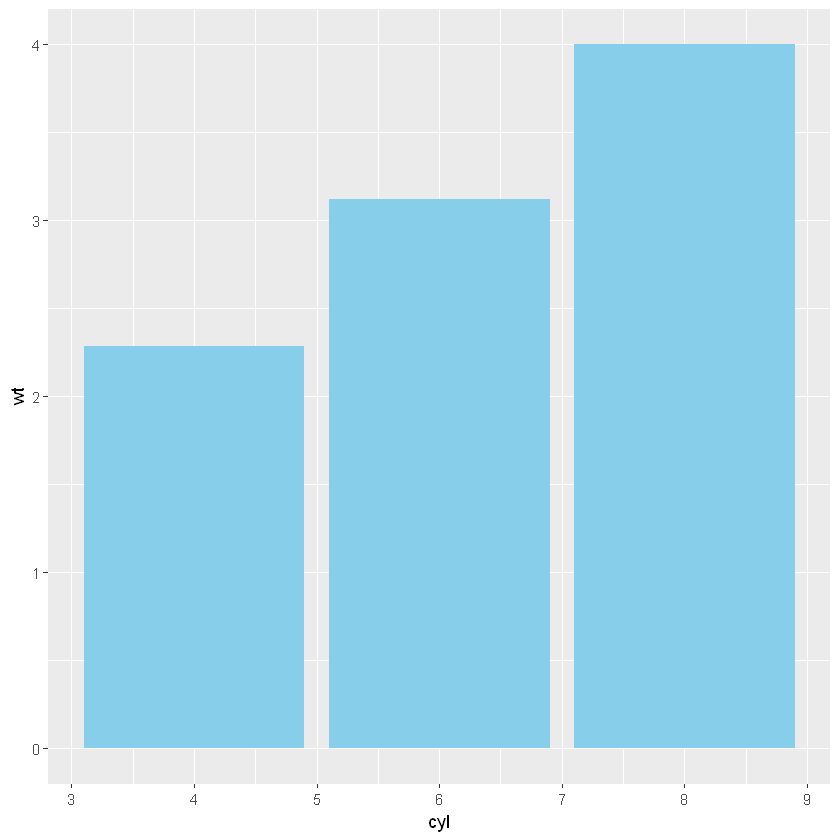

In [3]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl, y = wt))

# Draw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

### Bar Plots (2)

In the previous exercise we used the mtcars dataset to draw a dynamite plot about the weight of the cars per cylinder type.

In this exercise we will add a distinction between transmission type, am, for the dynamite plots.

Instructions
 - Update m so that we split the bars according to transmission type, am. Note that for bar plots, we want to change the col as well as the fill.
 - Plot 1 is already coded for you, but it is not optimal. Let's fix that in the following instructions.
 - Plot 2: copy the code for Plot 1 and set the position to "dodge" - this also doesn't work, because the default dodging is different for the different stat_summary() functions.
 - Plot 3: copy the code for Plot 2 and set the position to the object posn.d, which defines a dodge position using position_dodge(0.9).

In [ ]:
# Base layers
m <- ggplot(mtcars, aes(x = cyl,y = wt, col = am, fill = am))

# Plot 1: Draw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

# Plot 2: Set position dodge in each stat function
m +
  stat_summary(fun.y = mean, geom = "bar", position = "dodge") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
               geom = "errorbar", width = 0.1, position = "dodge")

# Set your dodge posn manually
posn.d <- position_dodge(0.9)

# Plot 3:  Redraw dynamite plot
m +
  stat_summary(fun.y = mean, geom = "bar", position = posn.d) +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1, position = posn.d)

### Bar Plots (3)

If it is appropriate to use bar plots (see the video for a discussion), then it would also be nice to give an impression of the number of values in each group.

stat_summary() doesn't keep track of the count. stat_sum() does (that's the whole point), but it's difficult to access. In this case, the most straightforward thing to do is calculate exactly what we want to plot beforehand. For this exercise we've created a summary data frame called mtcars.cyl which contains the average (wt.avg), standard deviations (sd) and count (n) of car weights, according to cylinders, cyl. It also contains the proportion (prop) of each cylinder represented in the entire dataset. Use the console to familiarize yourself with the mtcars.cyl data frame.

Instructions
 - Establish the base layers. Use the mtcars.cyl dataset and map cyl onto x and wt.avg onto y. Call the resulting ggplot object m.
 - Plot 1: Starting from m
 - Add a geom_bar() layer
 - In this geom_bar(), set the attribute stat to "identity" and the attribute fill to "skyblue".
 - Plot 2: Starting from Plot 1 (use copy-paste),
 - Add the mapping width = prop inside aes() of the geom_bar() layer. prop is a column of mtcars.cyl and represents the proportion of each group.
 - Plot 3: Starting from Plot 2 (use copy-paste),
 - Add error bars to create a dynamite plot using geom_errorbar()
 - Inside aes() of this geom_errorbar() layer, specify: ymin = wt.avg - sd and ymax = wt.avg + sd.
 - Inside geom_errorbar(), but outside its aes(), set the width = 0.1 to control the width of the error bars.

In [ ]:
# Base layers
m <- ggplot(mtcars.cyl, aes(x = cyl, y = wt.avg))

# Plot 1: Draw bar plot
m + geom_bar(stat="identity", fill="skyblue")

# Plot 2: Add width aesthetic
m + geom_bar(stat="identity", fill="skyblue", aes(width=prop))
  
# Plot 3: Add error bars
m + geom_bar(stat="identity", fill="skyblue", aes(width=prop)) +
geom_errorbar(aes(ymin = wt.avg - sd, ymax = wt.avg + sd), width = 0.1)


This is a good start, but it's difficult to adjust the spacing between the bars. We'll come back to a similar scenario in the case study in the next chaper.

## Best Practices: Pie Charts - Video

Pie Charts (1)
100xp
In this example we're going to consider a typical use of pie charts - a categorical variable as the proportion of another categorical variable. For example, the proportion of each transmission type am, in each cylinder, cyl class.

The first plotting function in the editor should be familiar to you by now. It's a straightforward bar chart with position = "fill", as shown in the viewer. This is already a good solution to the problem at hand! Let's take it one stap further and convert this plot in a pie chart.

Instructions
Adapt the code for the bar chart in the editor to turn it into a good looking pie chart:

Transform the bar plot into a facetted plot: add a facet_grid() call to split columns by cyl.
For the moment, each facet will only have one category because cyl is also mapped onto x. Use dummy aesthetic for the x. Change the aes() function such that factor(1) maps onto x.
Add a coord_polar() call where you specify the theta is set to "y".
This is already pretty good, but there's a small hole in the center of the pies. Inside geom_bar() set width = 1 so that the bars fill up the entire width resulting in a full pie chart.

In [10]:
mtcars$cyl=as.factor(mtcars$cyl)
mtcars$am = as.factor(mtcars$am)

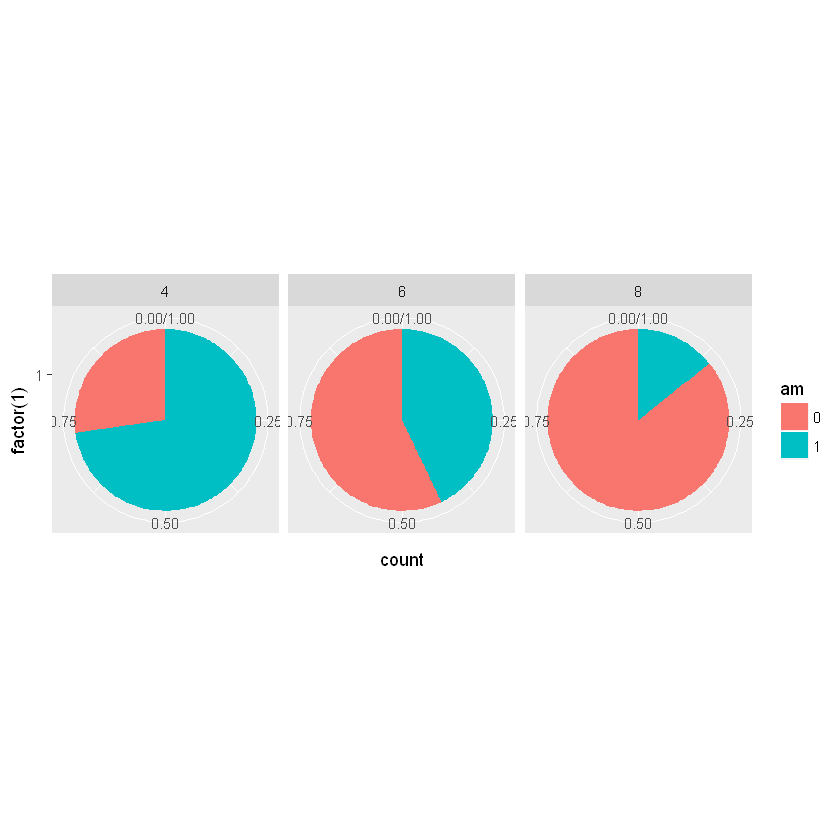

In [11]:
# Convert bar chart to pie chart
ggplot(mtcars, aes(x = factor(1), fill = am)) +
  geom_bar(position = "fill", width=1) +
  facet_grid(.~cyl) + 
  coord_polar(theta = "y") 

To complete this visualization we'd need to remove all the non-data ink and reposition our legend.

### Pie Charts (2)

In the previous example, we looked at the proportions of one categorical variable (am) as a proportion of another (cyl). In this example, we're interested in two, or possibly many, categorical variables independent of each other. Consider the pie charts in the viewer. This is an unsatisfactory visualization. What we're interested in asking is the relationship between all these variables (e.g. where are 8 cylinder cars represented on the Transmission, Gear and Carburetor variables?) You can also imagine that we want to know the values of those cars on other scales, such as their weight. How can we combine all this information?

The trick is to use a parallel coordinates plot, like this one. Each variable is plotted on its own axis and they are plotted as parallel axes. The individual observations are connected with lines, which can be colored according to another variable. This is a surprisingly useful visualization since we can combine many variables, even if they are on entirely different scales.

A word of caution though: typically it is very taboo to draw lines in this way. It's the reason why we don't draw lines across levels of a nominal variable - the order, and thus the slope of the line, is meaningless. Parallel plots are a (very useful) exception to the rule!

Instructions
 - Find the index of the am column in mtcars and assign this number to group_by_am. The object my_names_am will contain a numeric vector from 1 - 11 excluding the column with am.
 - Fill in the ggparcoord() function.
 - The first argument is the data frame you're using. mtcars in our case.
 - The second argument is the number of the columns to plot (my_names_am),
 - groupColumn specifies the column number of the grouping variable (group_by_am)
 - alpha, the opacity, should be set to 0.8

In [ ]:
# Parallel coordinates plot using GGally
library(GGally)

# All columns except am
group_by_am <- which(names(mtcars)=="am")
my_names_am <- (1:11)[-group_by_am]

# Basic parallel plot - each variable plotted as a z-score transformation
ggparcoord(mtcars, my_names_am, groupColumn = group_by_am, alpha = 0.8)

 Parallel plots not only allow us to see many different variables at the same time, but because we can apply specific statistics to each axis or the order of the axes, we can derive even more information from these plots.

In [ ]:
Plot Matrix (1)
50xp
The parallel coordinate plot from the last exercise is an excellent example of an exploratory plot. It presents a massive amount of information and allows the specialist to explore many relationships all at once. Another great example is a plot matrix (a SPLOM, from scatter plot matrix).

GGally::ggpairs(mtcars2) will produce the plot of a selection of the mtcars dataset, mtcars2, in the viewer. Depending on the nature of the dataset a specific plot type will be produced and if both variables are continuous the correlation (rho) will also be calculated.

The relationship between the variables drat and mpg is shown in two areas. What is the correlation between these two variables?

Possible Answers
 - 0.659
 - 0.681 (Correct)
 - 0.888
 - 0.419
This value is not given.
Take Hint (-15xp)

In [16]:
#install.packages('GGally', repos='http://cran.us.r-project.org')
library(GGally)

also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mohammads6\AppData\Local\Temp\Rtmp2h1RpP\downloaded_packages


Warning message:
"package 'GGally' was built under R version 3.4.2"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [ ]:
GGally::ggpairs(mtcars2)
> cor(mtcars2$drat, mtcars2$mpg)
[1] 0.6811719

### Plot Matrix (2)

On the right, another plot matrix is shown based off of a subset of the mtcars data frame. What is the relationship between disp and cyl?

Possible Answers
Click or Press Ctrl+1 to focus
 - As cyl increases, the distributuion of disp stays the same.
 - As cyl increases, disp decreases.
 - As cyl increases, so to does the disp. (Correct)
 - As cyl increases, the variance in disp decreases.
 - This information is not given.

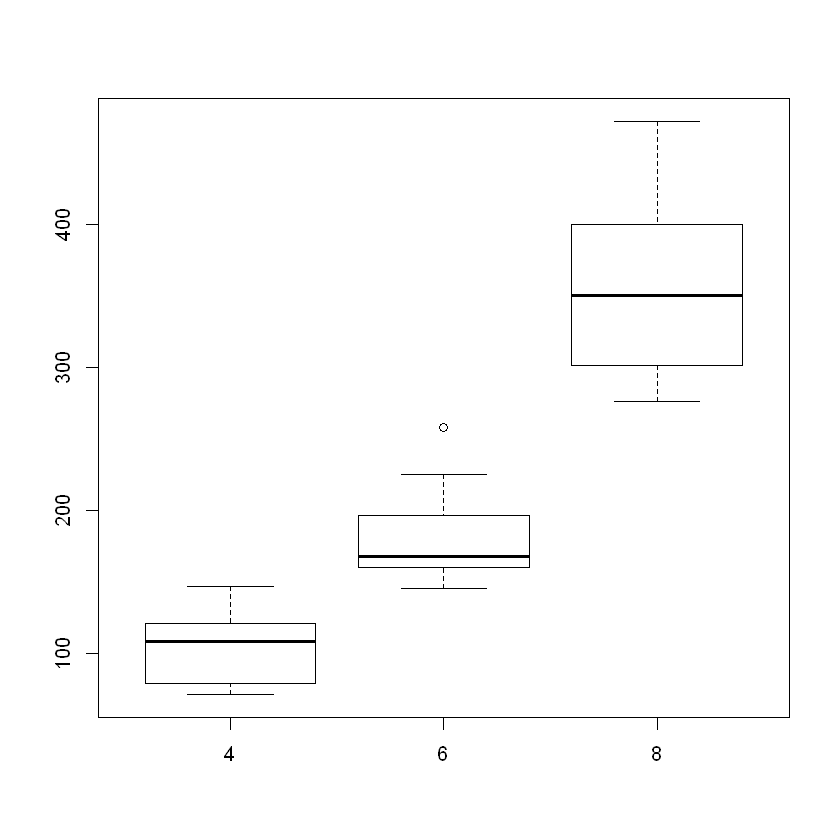

In [14]:
with(mtcars, plot(cyl, disp))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

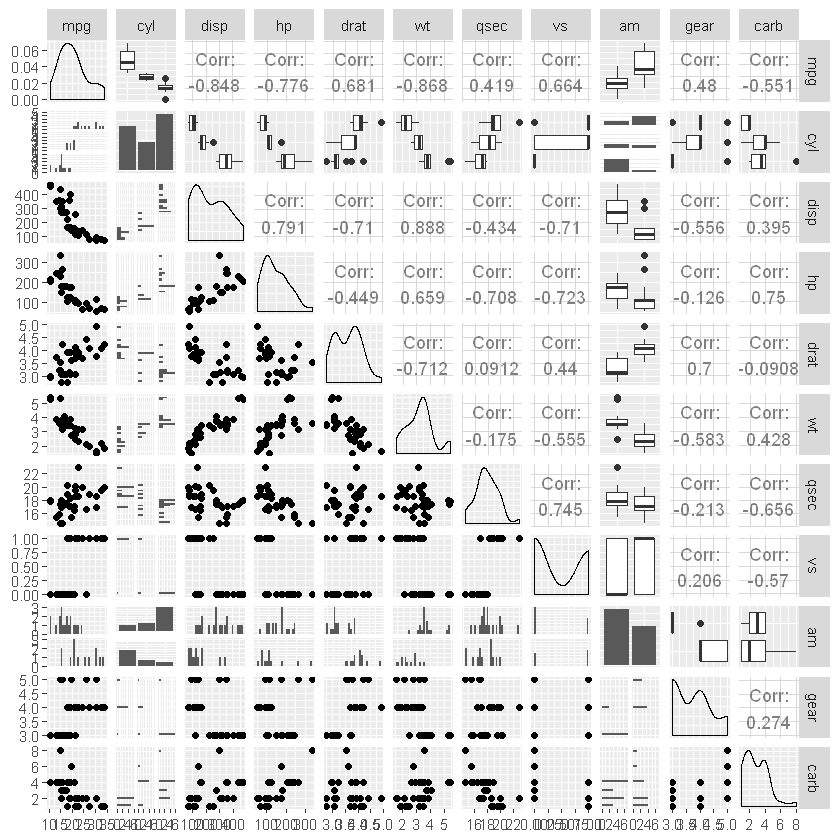

In [17]:
GGally::ggpairs(mtcars)

## Best Practices: Heat Maps - Video

In [18]:
library(lattice)

In [19]:
str(barley)

'data.frame':	120 obs. of  4 variables:
 $ yield  : num  27 48.9 27.4 39.9 33 ...
 $ variety: Factor w/ 10 levels "Svansota","No. 462",..: 3 3 3 3 3 3 7 7 7 7 ...
 $ year   : Factor w/ 2 levels "1932","1931": 2 2 2 2 2 2 2 2 2 2 ...
 $ site   : Factor w/ 6 levels "Grand Rapids",..: 3 6 4 5 1 2 3 6 4 5 ...


### Heat Maps
100xp

In the video you saw reasons for not using heat maps. Nonetheless, you may encounter a case in which you really do want to use one. Luckily, they're fairly straightforward to produce in ggplot2.

We begin by specifying two categorical variables for the x and y aesthetics. At the intersection of each category we'll draw a box, except here we call it a tile, using the geom_tile() layer. Then we will fill each tile with a continuous variable.

We'll produce the heat map we saw in the video with the built-in barley dataset. The barley dataset is in the lattice package and has already been loaded for you. Begin by exploring the structure of the data in the console using str().
Instructions

Reproduce the heat map shown in the viewer in different steps:

    Define the data and the aesthetics layer. Using the barley dataset, map year onto x, variety onto y and fill according to yield
    Add a geom_tile() to build the heat maps.
    So far the entire dataset it plotted on one heat map. Add a facet_wrap() function to get a facetted plot. Use the formula ~ site (without the dot!) and set ncol = 1. By default, the names of the farms will be above the panels, not to the side.
    brewer.pal() from the RColorBrewer package has been used to create a "Reds" color palette. The hexadecimal color codes are stored in the myColors object. Add the scale_fill_gradientn() function and specify the colors argument correctly to give the heat maps a reddish look.


In [20]:
# Create color palette
myColors <- brewer.pal(9, "Reds")

# Build the heat map from scratch
ggplot(barley, aes(x=year, y=variety, fill=yield)) +
geom_tile() + 
facet_wrap(~site, ncol=1) + 
scale_fill_gradientn(colors=myColors)

ERROR: Error in brewer.pal(9, "Reds"): could not find function "brewer.pal"


You can continue by using breaks, limits and labels to modify the fill scale and update the theme, but this is a pretty good start. 

### Heat Maps Alternatives (1)

There are several alternatives to heat maps. The best choice really depends on the data and the story you want to tell with this data. If there is a time component, the most obvious choice is a line plot like what we see in the viewer. Can you come up with the correct commands to create a similar looking plot?

The barley dataset is already available in the workspace. Feel free to check out its structure before you start!
Instructions

   - The line plot might be a good alternative:
   - Base layer: same dataset, map year onto x, yield onto y and variety onto col as well as onto group!
   - Add the appropriate geom for this line plot; no additional arguments are needed.
   - Add facetting with the same formula as in the heat map plot, instead of ncol, set nrow to 1.


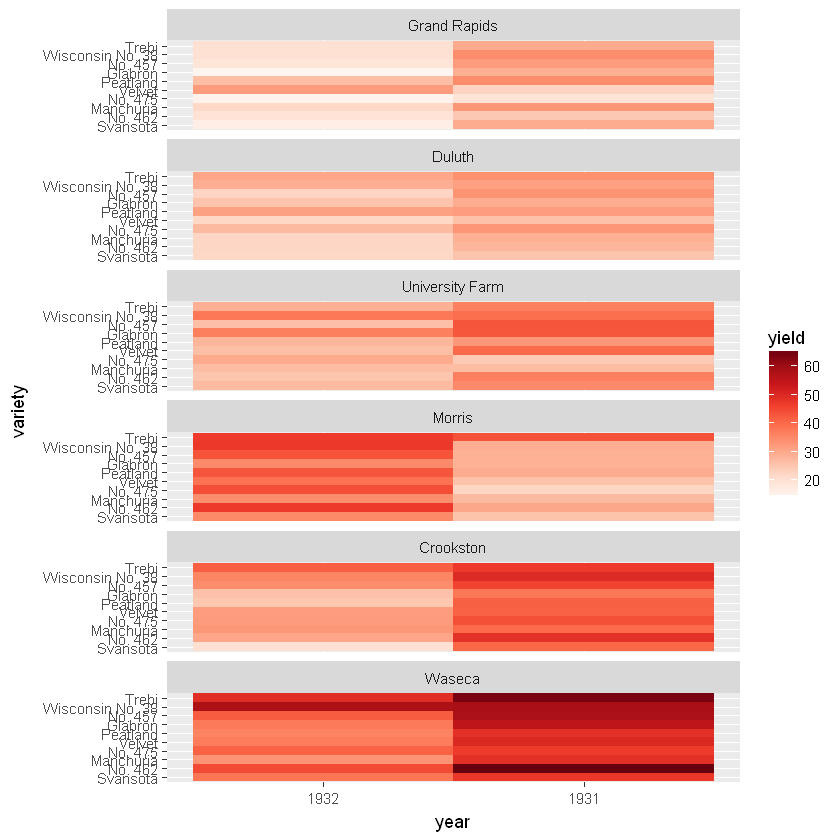

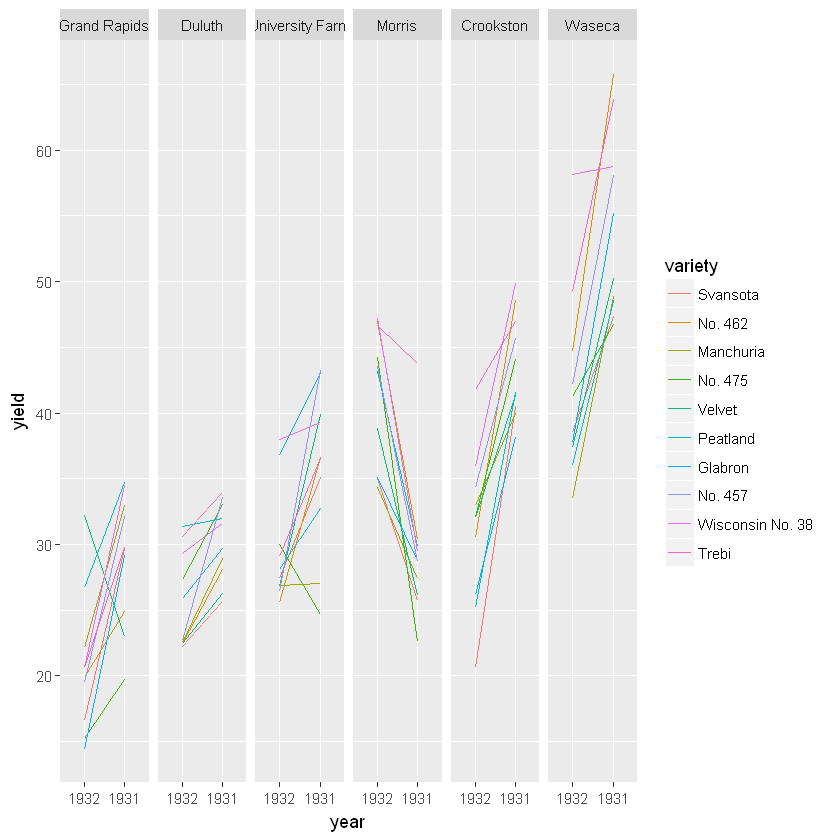

In [24]:
# The heat map we want to replace
# Don't remove, it's here to help you!
myColors <- brewer.pal(9, "Reds")
ggplot(barley, aes(x = year, y = variety, fill = yield)) +
  geom_tile() +
  facet_wrap( ~ site, ncol = 1) +
  scale_fill_gradientn(colors = myColors)

# Line plots
ggplot(barley, aes(x=year, y=yield,col=variety,  group=variety)) +
geom_line() +
facet_wrap(~site, nrow=1)

### Heat Maps Alternatives (2)

In the videos we saw two methods for depicting overlapping measurements of spread. You can use dodged error bars or you can use overlapping transparent ribbons (shown in the viewer). In this exercise we'll try to recreate the second option, the transparent ribbons.

The barley dataset is available. You can use str(barley) to refresh its structure before heading over to the instructions.
Instructions

Create a plot, similar to the one in the viewer, from scratch by following these steps:

  -  Base layer: use the barley dataset. Try to come up with the correct mappings for x, y, col, group and fill.
  -  Add a stat_summary() function for the mean. Specify fun.y to be mean and set geom to "line".
  -  Add a stat_summary() function for the ribbons. Set fun.data = mean_sdl and fun.args = list(mult = 1) to have a ribbon that spans over one standard deviation in both directions. Use the "ribbon" geom. Set col = NA and alpha = 0.1.




Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"

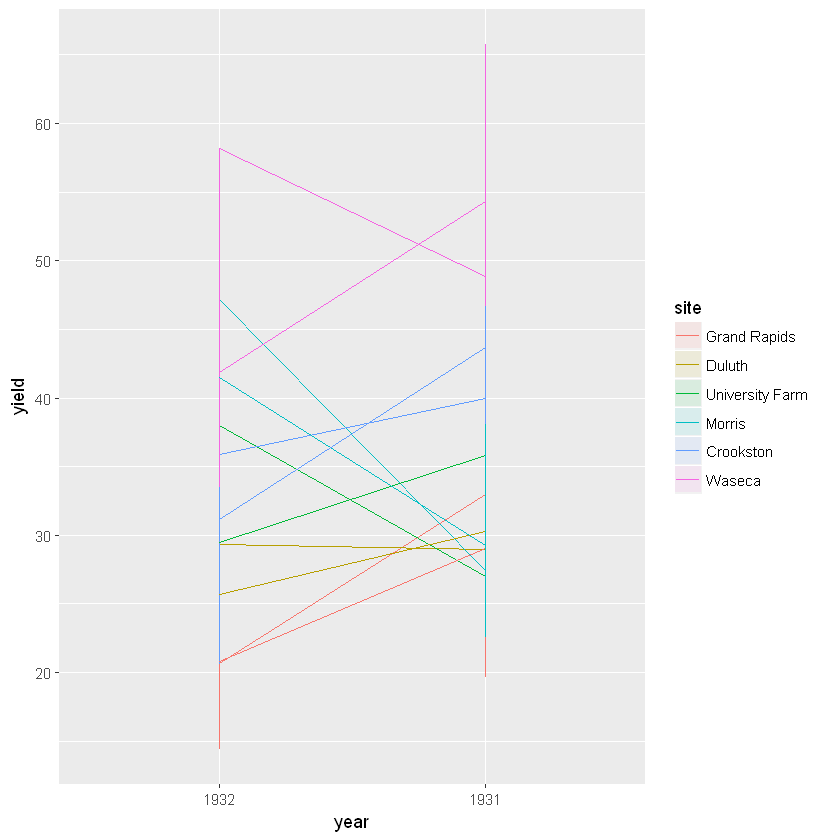

In [37]:
# Create overlapping ribbon plot from scratch
ggplot(barley, aes(x=year, y=yield, col=site, fill=site, group=site))+
geom_line() +
stat_summary(fun.y=mean, geom="line") +
stat_summary(fun.data=mean_sdl, fun.args=list(mult=1), geom="ribbon", col=NA, alpha=0.1)

In [31]:
head(barley)

yield,variety,year,site
27.00000,Manchuria,1931,University Farm
48.86667,Manchuria,1931,Waseca
27.43334,Manchuria,1931,Morris
39.93333,Manchuria,1931,Crookston
32.96667,Manchuria,1931,Grand Rapids
28.96667,Manchuria,1931,Duluth


# 5. Case Study 

## CHIS - Descriptive Statistics - Video

### Exploring Data


In this chapter we're going to continuously build on our plotting functions and understanding to produce a mosaic plot (aka Merimeko plot). This is a visual representation of a contingency table, comparing two categorical variables. Essentially, our question is which groups are over or under represented in our dataset. To visualize this we'll color groups according to their pearson residuals from a chi-squared test. At the end of it all we'll wrap up our script into a flexible function so that we can look at other variables.

We'll familiarize ourselves with a small number of variables from the 2009 CHIS adult-response dataset (as opposed to children). We have selected the following variables to explore:

    RBMI: BMI Category description
    BMI_P: BMI value
    RACEHPR2: race
    SRSEX: sex
    SRAGE_P: age
    MARIT2: Marital status
    AB1: General Health Condition
    ASTCUR: Current Asthma Status
    AB51: Type I or Type II Diabetes
    POVLL: Poverty level

We'll filter our dataset to plot a more reliable subset (we'll still retain over 95% of the data).

Before we get into mosaic plots it's worthwhile exploring the dataset using simple distribution plots - i.e. histograms.

ggplot2 is already loaded and the dataset, named adult, is already available in the workspace.
Instructions

   - Use the typical commands for exploring the structure of adult to get familiar with the variables: summary() and str().
   - As a first exploration of the data, plot two histograms using ggplot2 syntax: one for age (SRAGE_P) and one for BMI (BMI_P). The goal is to explore the dataset and get familiar with the distributions here. Feel free to explore different bin widths. We'll ask some questions about these in the next exercises.
   - Next plot a binned-distribution of age, filling each bar according to the BMI categorization. Inside geom_histogram(), set binwidth = 1. You'll want to use factor() to map RBMI as a categorical variable.


In [41]:
#adult = read.csv("CHIS2009_reduced_2.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"line 3 appears to contain embedded nulls"Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"line 4 appears to contain embedded nulls"Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"embedded nul(s) found in input"

In [42]:
#head(adult)

RDX2
X
=p¤@:&fffff@9\(õÂ@8ýp£×
=@9
=p£×@@áG®{@;záG®@4ã×
=p¤@9áG®zá@9Ñë… ¸R@;záG®{@1ã×
=p¤@>}p£×


In [ ]:
# Explore the dataset with summary and str
str(adult)
summary(adult)

# Age histogram
ggplot(adult, aes(x=SRAGE_P)) + geom_histogram()


# BMI histogram
ggplot(adult, aes(x=BMI_P)) + geom_histogram()


# Age colored by BMI, default binwidth
ggplot(adult, aes(x=SRAGE_P, fill=factor(RBMI))) + geom_histogram(binwidth=1)

### Unusual Values
50xp

In the previous exercise you used histograms to explore the age and BMI distributions and their relationships to each other in the CHIS dataset. What unusual phenomenon stood out?

If you want to experiment some more with the data, go ahead - it's available as adult in your workspace!
Possible Answers

    BMI is symmetrical around 25, the border between healthy and overweight.
    1
    There is an unexpectedly large number of very old people. (Correct)
    2
    The proportion of each BMI category is consistent throughout ages.
    3
    The dataset indicates that California is a very young population.
    4

    Take Hint (-15xp)

In [ ]:
Yes, it looks like everyone 85 and above has been categorized as 85 years old. 

In [ ]:
Default Binwidths
50xp

If you don't specify the binwidth argument inside geom_histogram() you can tell from the message that 30 bins are used by default. This will then specify the binwidth that is used. What is this binwidth for the age variable, SRAGE_P, of the adult dataset?
Possible Answers

    1.00
    1
    1.66
    2
    2.00
    3
    2.23 (Correct)
    4

    Take Hint (-15xp)

In [ ]:
### Data Cleaning

Now that we have an idea about our data, let's clean it up.
Instructions

   - You should have noticed in the age distribution that there is an unusual spike of individuals at 85, which seems like an artifact of data collection and storage. Solve this by only keeping observations for which adult$SRAGE_P is smaller than or equal to 84.
   - There is a long positive tail on the BMIs that we'd like to remove. Only keep observations for which adult$BMI_P is bigger than or equal to 16 and adult$BMI_P is strictly smaller than 52.
   - We'll focus on the relationship between the BMI score (& category), age and race. To make plotting easier later on, we'll change the labels in the dataset. Define adult$RACEHPR2 as a factor with labels c("Latino", "Asian", "African American", "White"). Do the same for adult$RBMI, using the labels c("Under-weight", "Normal-weight", "Over-weight", "Obese").


In [ ]:
# Remove individual aboves 84
adult <- adult[adult$SRAGE_P <= 84, ]

# Remove individuals with a BMI below 16 and above or equal to 52
adult <- adult[adult$BMI_P >= 16 & adult$BMI_P < 52, ]

# Relabel the race variable:
adult$RACEHPR2 <- factor(adult$RACEHPR2, labels = c("Latino", "Asian", "African American", "White"))

# Relabel the BMI categories variable:
adult$RBMI <- factor(adult$RBMI, labels = c("Under-weight", "Normal-weight", "Over-weight", "Obese"))

### Multiple Histograms

When we introduced histograms we focused on univariate data, which is exactly what we've been doing here. However, when we want to explore distributions further there is much more we can do. For example, there are density plots, which you'll explore in the next course. For now, we'll look deeper at frequency histograms and begin developing our mosaic plots.

The adult dataset, which is cleaned up by now, is availabe in the workspace for you.
Instructions

  -  For the first instruction, you don't have to add any code. Just have a look at the BMI_fill. This is a scale layer which we can add to a ggplot() command using +: ggplot(...) + BMI_fill. Next, have a look at fix_strips, this is a theme() layer which will make the category titles display more natural when using a faceted plot.
  -  The histogram from the first exercise of age colored by BMI has been provided. The predefined theme(), fix_strips has been added to the histogram. Add BMI_fill to this plot using the + operator as well.
  -  In addition, add the following elements to create a pretty insightful plot:
  -  Use facet_grid() to facet the rows according to RBMI.
  -  Add the classic theme using theme_classic().


In [ ]:
# The dataset adult is available

# The color scale used in the plot
BMI_fill <- scale_fill_brewer("BMI Category", palette = "Reds")

# Theme to fix category display in faceted plot
fix_strips <- theme(strip.text.y = element_text(angle = 0, hjust = 0, vjust = 0.1, size = 14),
                    strip.background = element_blank(),
                    legend.position = "none")

# Histogram, add BMI_fill and customizations
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  fix_strips +
  BMI_fill +
  facet_grid(RBMI~.) +
  theme_classic()

### Alternatives

In the previous exercise we looked at different ways of showing the absolute count of multiple histograms. This is fine, but density would be more useful measure if we wanted to see how the frequency of one variable changes accross another. However, there are some difficulties here, so let's take a closer look at different plots.

The clean adult dataset is available, as is the BMI_fill color palette. The first plot simply shows a histogram of counts, without facets, without modified themes. It's denoted Plot 1.
Instructions

   - Plot 2 - Copy, paste and adapt the code for plot 1 so that it shows density. Do this by adding aes(y = ..density..) inside the geom_histogram() function. This plot looks really strange, because we get the density within each BMI category, not within each age group!
   - Plot 3 - starting from plot 1, create a faceted histogram. Use facet_grid() with the formula: RBMI ~ ..
   - Plot 4 - starting from plot 2, create a faceted histogram showing density. Use facet_grid() with the formula RBMI ~ .. Plots 3 and 4 can be useful if we are interested in the frequency distribution within each BMI category.
   - Plot 5 - Change the second plot to have position = "fill". This is not an accurate representation, as density calculates the proportion across category, and not across bin.
   - Plot 6 - To get an accurate visualization, change Plot 5, but this time, instead of ..density.., set the y aesthetic to ..count../sum(..count..).


In [ ]:
# Plot 1 - Count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill

# Plot 2 - Density histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..),binwidth = 1) +
  BMI_fill

# Plot 3 - Faceted count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill +
  facet_grid(RBMI ~ .)

# Plot 4 - Faceted density histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..),binwidth = 1) +
  BMI_fill +
  facet_grid(RBMI ~ .)
  
# Plot 5 - Density histogram with position = "fill"
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..),binwidth = 1,, position="fill") +
  BMI_fill



# Plot 6 - The accurate histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)),binwidth = 1, position="fill") +
  BMI_fill


### Do Things Manually


In the previous exercise we looked at how to produce a frequency histogram when we have many sub-categories. The problem here is that this can't be facetted because the calculations occur on the fly inside ggplot2.

To overcome this we're going to calculate the proportions outside ggplot2. This is the beginning of our flexible script for a mosaic plot.

The dataset adult and the BMI_fill object from the previous exercise have been carried over for you. Code that tries to make the accurate frequency histogram faceted is available. Execute it to understand what is happening.
Instructions

  -  Use adult$RBMI and adult$SRAGE_P as arguments in table() to create a contingency table of the two variables. Save this as DF.
  -  Use apply() To get the frequency of each group. The first argument is DF, the second argument 2, because you want to do calculations on each column. The third argument should be function(x) x/sum(x). Store the result as DF_freq.
  -  Load the reshape2 package and use the melt() function on DF_freq. Store the result as DF_melted. Examine the structure of DF_freq and DF_melted if you are not familiar with this operation.
  -  Use names() to rename the variables in DF_melted to be c("FILL", "X", "value"), with the prospect of making this a generalized function later on.
  -  The plotting call at the end uses DF_melted. Add code to make it faceted. Use the formula FILL ~ .. Note that we use geom_bar() now!


In [ ]:
# An attempt to facet the accurate frequency histogram from before (failed)
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 1, position = "fill") +
  BMI_fill +
  facet_grid(RBMI ~ .)

# Create DF with table()
DF = table(adult$RBMI, adult$SRAGE_P)

# Use apply on DF to get frequency of each group
DF_freq = apply(DF, 2, function(x) x/sum(x))

# Load reshape2 and use melt on DF to create DF_melted
library(reshape2)
DF_melted = melt(DF_freq)

# Change names of DF_melted
names(DF_melted) = c("FILL", "X", "value")

# Add code to make this a faceted plot
ggplot(DF_melted, aes(x = X, y = value, fill = FILL)) +
  geom_bar(stat = "identity", position = "stack") +
  BMI_fill +
  facet_grid(FILL ~ .)

## CHIS - Mosaic Plots - Video

### Merimeko/Mosaic Plot

In the previous exercise we looked at different ways of showing the frequency distribution within each BMI category. This is all well and good, but the absolute number of each age group also has an influence on if we will consider something as over-represented or not. Here, we will proceed to change the widths of the bars to show us something about the n in each group.

This will get a bit more involved, because the aim is not to draw bars, but rather rectangles, for which we can control the widths. You may have already realized that bars are simply rectangles, but we don't have easy access to the xmin and xmax aesthetics, but in geom_rect() we do! Likewise, we also have access to ymin and ymax. So we're going to draw a box for every one of our 268 distinct groups of BMI category and age.

The clean adult dataset, as well as BMI_fill, are already available. Instead of running apply() like in the previous exercise, the contingency table has already been transformed to a data frame using as.data.frame.matrix().
Instructions

   - To build the rectangle plot, we'll add several variables to DF:
   - groupSum, containing the sum of each row in the DF. Use rowSums() to calculate this. groupSum represents the total number of individuals in each age group.
   - xmax: the xmax value for each rectangle, calculated as cumsum(DF$groupSum)
   - xmin: the xmin value for each rectangle, calculated by subtracting the groupSum column from the xmax column.
   - The names of the x axis groups are stored in the row names, which is pretty bad style, so make a new variable, X, that stores the values of row.names() for DF.
   - Now we are ready to melt the dataset. Load reshape2 and use melt() on DF. Specify the id.vars variables as c("X", "xmin", "xmax") and the variable.name argument as "FILL". Store the result as DF_melted.
   - Have a look at the dplyr call that calculates the ymax and ymin columns of DF_melted. It first groups by X and then calculates cumulative proportions. The result is stored as DF_melted again.
   - If all goes well you should see the plot in the viewer when you execute the plotting function at the bottom of the script.


In [ ]:
# The initial contingency table
DF <- as.data.frame.matrix(table(adult$SRAGE_P, adult$RBMI))

# Add the columns groupsSum, xmax and xmin. Remove groupSum again.
DF$groupSum <- rowSums(DF)
DF$xmax <- cumsum(DF$groupSum)
DF$xmin <- DF$xmax - DF$groupSum 
# The groupSum column needs to be removed, don't remove this line
DF$groupSum <- NULL

# Copy row names to variable X
DF$X <- row.names(DF)

# Melt the dataset
library(reshape2)
DF_melted <- melt(DF, id.vars = c("X", "xmin", "xmax"), variable.name = "FILL")

# dplyr call to calculate ymin and ymax - don't change
library(dplyr)
DF_melted <- DF_melted %>%
  group_by(X) %>%
  mutate(ymax = cumsum(value/sum(value)),
         ymin = ymax - value/sum(value))

# Plot rectangles - don't change.
library(ggthemes)
ggplot(DF_melted, aes(ymin = ymin,
                 ymax = ymax,
                 xmin = xmin,
                 xmax = xmax,
                 fill = FILL)) +
  geom_rect(colour = "white") +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  BMI_fill +
  theme_tufte()

### Adding statistics

In the previous exercise we generated a plot where each individual bar was plotted separately using rectangles (shown in the viewer). This means we have access to each piece and we can apply different fill parameters.

So let's make some new parameters. To get the Pearson residuals, we'll use the chisq.test().

The data frames adult and DF_melted, as well as the object BMI_fill that you created throughout this chapter, are all still available. The reshape2 package is already loaded.
Instructions

   - Use the adult$RBMI (corresponding to FILL) and adult$SRAGE_P (corresponding to X) columns inside the table() function that's inside the chisq.test() function. Store the result as results.
   - The residuals can be accessed through results$residuals. Apply the melt() function on them with no further arguments. Store the resulting data frame as resid.
   - Change the names of resid to c("FILL", "X", "residual"). This is so that we have a consistent naming convention similar to how we called our variables in the previous exercises.
   - The data frame from the previous exercise, DF_melted is already available. Use the merge() function to bring the two data frames together. Store the result as DF_all.
   - Adapt the code in the ggplot command to use DF_all instead of DF_melted. Also, map residual onto fill instead of FILL.


Hint

   - We'll use a table for input to chisq.text, so use chisq.test(table(adult$RBMI, adult$SRAGE_P)) to construct it from our data.
   - Use melt(results$residuals) and store the result as resid.
   - To merge the data frames DF_melted and resid, simply pass them to merge() in this order.


In [ ]:
# Perform chi.sq test (RBMI and SRAGE_P)
results <- chisq.test(table(adult$RBMI, adult$SRAGE_P))

# Melt results$residuals and store as resid
resid = melt(results$residuals)

# Change names of resid
names(resid) = c("FILL", "X", "residual")

# merge the two datasets:
DF_all = merge(DF_melted,resid, by = c("X","FILL"))

# Update plot command
library(ggthemes)
ggplot(DF_all, aes(ymin = ymin,
                   ymax = ymax,
                   xmin = xmin,
                   xmax = xmax,
                   fill = residual)) +
  geom_rect() +
  scale_fill_gradient2() +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  theme_tufte()

### Adding text

Now that we are not coloring according to BMI category, we have to add the group labels manually. Also, we neglected to label the x-axis properly!

Here we'll use the label aesthetic inside geom_text(). The actual labels will be the FILL and X columns in the DF data frame. Since we have axes on the left and bottom of our plot, we'll add information to the top and right inner edges of the plot. We could have also added margin text, but that is a more advanced topic. This will be a suitable solution for the moment.
Instructions

  -  To position our labels correctly, we need to calculate the midpoint between each xmax and xmin value. To get this, calculate the half difference between each pair of xmax and xmin then add this value to xmin.
  -  For this instruction, you don't have to write code yourself. For the y label positions, we only want to work with the values at the maximum xmax, i.e. at the very end. The code to calculate the ytext column is already available. Try to understand it.
  -  Now that xtext and ytext are available, we can add the labels to our plot. In the two geom_text() functions, separate aesthetics are defined that control the x and y positioning of the labels.
  -  For the age groups, set the x position with xtext. The y position is fixed since our y axis is always going to end at 1.
  -  For the labeling of the y axis, the second geom_text() has three aesthetics since the position on the right will depend on the size of our dataset in the future. Fill in the ___ accordingly. x depends on the max() of xmax. You will have to use the predefind ytext column for y. The correct label is available in the FILL column.
  -  Some additional attributes have been set inside geom_text(), outside the aes() function. This is just some fine tweaking to get the positioning and angle correct. It's not perfect, but since this is an exploratory plot, it does a pretty good job.


In [ ]:
# Position for labels on x axis
DF_all$xtext <- DF_all$xmin + (DF_all$xmax - DF_all$xmin)/2

# Position for labels on y axis (don't change)
index <- DF_all$xmax == max(DF_all$xmax)
DF_all$ytext <- DF_all$ymin[index] + (DF_all$ymax[index] - DF_all$ymin[index])/2

# Plot
ggplot(DF_all, aes(ymin = ymin, ymax = ymax, xmin = xmin,
                   xmax = xmax, fill = residual)) +
  geom_rect(col = "white") +
  # geom_text for ages (i.e. the x axis)
  geom_text(aes(x = xtext,
                label = X),
            y = 1,
            size = 3,
            angle = 90,
            hjust = 1,
            show.legend = FALSE) +
  # geom_text for BMI (i.e. the fill axis)
  geom_text(aes(x = max(xmax),
                y = ytext,
                label = FILL),
            size = 3,
            hjust = 1,
            show.legend  = FALSE) +
  scale_fill_gradient2() +
  theme_tufte() +
  theme(legend.position = "bottom")

### Generalizations

Now that you've done all the steps necessary to make our mosaic plot, you can wrap all the steps into a single function that we can use to examine any two variables of interest in our data frame (or in any other data frame for that matter). For example, we can use it to examine the Vocab data frame we saw earlier in this course.

You've seen all the code in our function, so there shouldn't be anything surprising there. Notice that the function takes multiple arguments, such as the data frame of interest and the variables that you want to create the mosaic plot for. None of the arguments have default values, so you'll have to specify all three if you want the mosaicGG() function to work.

Start by going through the code and see if you understand the function's implementation.
Instructions

  -  Calling mosaicGG(adult, "SRAGE_P","RBMI") will result in the plot you've been working on so far. Try this out. This gives you a mosaic plot where BMI is described by age.
  -  Test out another combination of variables in the adult data frame: Poverty (POVLL) described by Age (SRAGE_P).
  -  Try the function on other datasets we've worked with throughout this course:
  -  mtcars dataset: am described by cyl
  -  Vocab dataset: vocabulary described by education.


In [ ]:
# Load all packages
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggthemes)

# Script generalized into a function
mosaicGG <- function(data, X, FILL) {

  # Proportions in raw data
  DF <- as.data.frame.matrix(table(data[[X]], data[[FILL]]))
  DF$groupSum <- rowSums(DF)
  DF$xmax <- cumsum(DF$groupSum)
  DF$xmin <- DF$xmax - DF$groupSum
  DF$X <- row.names(DF)
  DF$groupSum <- NULL
  DF_melted <- melt(DF, id = c("X", "xmin", "xmax"), variable.name = "FILL")
  library(dplyr)
  DF_melted <- DF_melted %>%
    group_by(X) %>%
    mutate(ymax = cumsum(value/sum(value)),
           ymin = ymax - value/sum(value))

  # Chi-sq test
  results <- chisq.test(table(data[[FILL]], data[[X]])) # fill and then x
  resid <- melt(results$residuals)
  names(resid) <- c("FILL", "X", "residual")

  # Merge data
  DF_all <- merge(DF_melted, resid)

  # Positions for labels
  DF_all$xtext <- DF_all$xmin + (DF_all$xmax - DF_all$xmin)/2
  index <- DF_all$xmax == max(DF_all$xmax)
  DF_all$ytext <- DF_all$ymin[index] + (DF_all$ymax[index] - DF_all$ymin[index])/2

  # plot:
  g <- ggplot(DF_all, aes(ymin = ymin,  ymax = ymax, xmin = xmin,
                          xmax = xmax, fill = residual)) +
  geom_rect(col = "white") +
  geom_text(aes(x = xtext, label = X),
            y = 1, size = 3, angle = 90, hjust = 1, show.legend = FALSE) +
  geom_text(aes(x = max(xmax),  y = ytext, label = FILL),
            size = 3, hjust = 1, show.legend = FALSE) +
  scale_fill_gradient2("Residuals") +
  scale_x_continuous("Individuals", expand = c(0,0)) +
  scale_y_continuous("Proportion", expand = c(0,0)) +
  theme_tufte() +
  theme(legend.position = "bottom")
  print(g)
}

# BMI described by age
mosaicGG(adult, "SRAGE_P","RBMI")

# Poverty described by age
mosaicGG(adult, "SRAGE_P","POVLL")

# mtcars: am described by cyl
mosaicGG(mtcars, "cyl","am")

# Vocab: vocabulary described by education
library(car)
mosaicGG(Vocab, "education","vocabulary")

# Thank You